In [1]:
# OpenOE_AC_map_v1_01, 06/30/15
#__version__=1.02
#__version__=1.03 # removing the initial gap (acquired when Open Ephys is initialized)
__version__=1.04 # 07/03/15, adding saving the averaged file into an hdf5-file
__version__=1.05 # fixing the averaging, AAC
__version__=1.06 # fixed variable initial TTL-triggered datapoints removal, zeroing time
__version__ # CSD added CSD analysis
__version__=1.07 # file output is now into the report directory
__version__=1.08 # batch analysis, one figure summary output
__version__=1.0801 #troubleshooting misalignment during averaging, single channel from d2_array seems fine.
__version__=1.0802 # creating summaries for all three columns of the 64ch shank
__version__=1.09 # 07/27/15 Sorting order of file_list is fixed, CSD working properly. everything is working
__version__=1.0901 # 07/29/15 true CSD
__version__=1.12 # 03/15/16 - added spectrogram, frequency analysis
__version__=1.13 # 04/08/16 - use seaborn for formatting for publication (larger fonts, despined)
__version__=1.14 # 07/29/16 - trying to remove trials with mouse movement from the final averaged LFP using 1500 uV threshold



initial_gap=7168 # this is now recalculated later in the code, as this is variable from trial-to-trial

probe='64DA'

if probe=='64DA':
    
     # 64D probe mapping, channels face me
        probe_map={47:0.00, 63:1.00, 17:2.00,
               46:0.01, 0:1.01, 18:2.01,
               45:0.02, 62:1.02, 19:2.02,
               44:0.03, 1:1.03, 20:2.03,
               43:0.04, 61:1.04, 21:2.04,
               42:0.05, 2:1.05, 22:2.05,
               41:0.06, 60:1.06, 23:2.06,
               40:0.07, 3:1.07, 24:2.07,
               39:0.08, 59:1.08, 25:2.08,
               38:0.09, 4:1.09, 26:2.09,
               37:0.10, 58:1.10, 27:2.10,
               36:0.11, 5:1.11, 28:2.11,
               35:0.12, 57:1.12, 29:2.12,
               34:0.13, 6:1.13, 30:2.13,
               33:0.14, 56:1.14, 31:2.14,
               32:0.15, 7:1.15, 16:2.15,
               48:0.16, 55:1.16, 15:2.16,
               49:0.17, 8:1.17, 14:2.17,
               50:0.18, 54:1.18, 13:2.18,
               51:0.19, 9:1.19, 12:2.19,
               52:0.20, 53:1.20, 11:2.20,
                        10:1.21
               }     


elif probe == '64DB':
    # 64D probe mapping, channels face monitor
        probe_map={16:0.00, 0:1.00, 46:2.00,
               17:0.01, 63:1.01, 45:2.01,
               18:0.02, 1:1.02, 44:2.02,
               19:0.03, 62:1.03, 43:2.03,
               20:0.04, 2:1.04, 42:2.04,
               21:0.05, 61:1.05, 41:2.05,
               22:0.06, 3:1.06, 40:2.06,
               23:0.07, 60:1.07, 39:2.07,
               24:0.08, 4:1.08, 38:2.08,
               25:0.09, 59:1.09, 37:2.09,
               26:0.10, 5:1.10, 36:2.10,
               27:0.11, 58:1.11, 35:2.11,
               28:0.12, 6:1.12, 34:2.12,
               29:0.13, 57:1.13, 33:2.13,
               30:0.14, 7:1.14, 32:2.14,
               31:0.15, 56:1.15, 47:2.15,
               15:0.16, 8:1.16, 48:2.16,
               14:0.17, 55:1.17, 49:2.17,
               13:0.18, 9:1.18, 50:2.18,
               12:0.19, 54:1.19, 51:2.19,
               11:0.20, 10:1.20, 52:2.20,
                        53:1.21
               }
        


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']  


# pal=sns.blend_palette(["black", "crimson"], 2)
sns.despine()
# current_palette = sns.color_palette("colorblind", 10)
# sns.set_palette(current_palette)

# for publication quality plots, not bar graphs, use this: 
def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()

%load_ext autoreload
%autoreload 2

import scipy.signal as sg
sns.set_context("poster")
sns.set_style("ticks")
from collections import Counter
import Python3_OpenEphys_V14 as OE
import pandas as pd
from pandas import DataFrame
import numpy as np
from glob import glob
import os
# import re
import sys
import fnmatch

<Figure size 640x480 with 0 Axes>

In [3]:
# import seaborn as sns
import Python3_OpenOE_AC_map_functions_v1_08_30s as oem
# %matplotlib inline
import scipy
sns.set_context('poster')

load data

In [31]:
path=r'u:\Data\tang232\V1+LM\aligneddataall\BPnoise'
ls=[os.path.join(path, fd) for fd in os.listdir(path) if '.txt' not in fd]
ls1=[os.path.join(p,fd) for p in ls for fd in os.listdir(p) if '.txt' not in fd and '.npy' not in fd and '.png' not in fd]
files=[os.path.join(p,f) for p in ls1 for f in os.listdir(p)]
match = [f for f in files if '.npy' in f 
                             and 'broke' not in f 
                             and '.txt' not in f
                             #and not any(et in f for et in et_to_exclude)
        ]
match[:5]

['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy']

In [32]:
note=r'u:\Data\tang232\V1+LM\aligneddataall\BPnoise\et_to_exclude.txt'

text_file = open(note, "r")
# lines = text_file.readlines()
lines = text_file.read().split('\n')
et_to_exclude=[et for et in lines if 'ET#' in et]
text_file.close()
print (et_to_exclude)
match=[f for f in match if not any(et in f for et in et_to_exclude)]
for f in sorted(match):
    print (f.split('\\')[-1])


['ET#010_right_pre', 'ET#012_right_post', 'ET#013_right_post', 'ET#014_right_post', 'ET#015_right_post']
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_0.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_1.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_004 BPnoise

In [33]:
## stim info, for ET#009 and ET#010
import os
movpath=r'u:\Visual Stimulation\Yu Visual Stim\BPnoise\0.2duration'

mov_names=[m for m in os.listdir(movpath) if 'mp4' in m]
print(sorted(mov_names))
order = [ 2,  7, 17, 18, 21,  6,  3,  1, 22, 14, 13, 12,  8,  0, 16, 23,  5,
15, 24, 20, 10, 19,  9, 11,  4]

['0.015_0.75_pinknoise.mp4', '0.015_1.5_pinknoise.mp4', '0.015_12_pinknoise.mp4', '0.015_3_pinknoise.mp4', '0.015_6_pinknoise.mp4', '0.03_0.75_pinknoise.mp4', '0.03_1.5_pinknoise.mp4', '0.03_12_pinknoise.mp4', '0.03_3_pinknoise.mp4', '0.03_6_pinknoise.mp4', '0.06_0.75_pinknoise.mp4', '0.06_1.5_pinknoise.mp4', '0.06_12_pinknoise.mp4', '0.06_3_pinknoise.mp4', '0.06_6_pinknoise.mp4', '0.12_0.75_pinknoise.mp4', '0.12_1.5_pinknoise.mp4', '0.12_12_pinknoise.mp4', '0.12_3_pinknoise.mp4', '0.12_6_pinknoise.mp4', '0.24_0.75_pinknoise.mp4', '0.24_1.5_pinknoise.mp4', '0.24_12_pinknoise.mp4', '0.24_3_pinknoise.mp4', '0.24_6_pinknoise.mp4']


In [34]:
ets=set([str('_'.join(p.split('\\')[-1].split('_')[3:5])) for p in match])
dur200 = [et for et in ets if int(et.split('_')[0][-2:])>=12]
dur200[:5]

['ET#059_left', 'ET#012_left', 'ET#052_right', 'ET#060_left', 'ET#073_right']

In [35]:
matchc=[]
for pp in set([i.split('\\')[-3] for i in match]):
    subf = [f for f in match if pp in f]
#     for et in set([i.split('\\')[-1].split('_')[3] for i in subf]):
    for et in set(dur200):
        subf1 = [f for f in subf if et in f]
        for rg in set([i.split('\\')[-2] for i in subf1]):
            subf2 = [f for f in subf1 if rg in f.split('\\')[-2]]
            for exprt in set([' '.join(i.split('\\')[-1].split('_')[6].split(' ')[1:]) for i in subf2]):
                subf3 = [f for f in subf2 if exprt in f]
#                 print(exprt)
                for sk in set([i.split('\\')[-1].split('_')[-1] for i in subf3]):
                    subf4 = sorted([f for f in subf3 if sk in f])
                    matchc.append(subf4)
matchc

[['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH135_2.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH135_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH135_1.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH135_1.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH135_0.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH135_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_11.

In [36]:
onestimmactchs=glob(path+'\*\*\onestim\*.npy')
# onestimmactchs[:5]
onestimmactchc=[]
dictionary={}
for x in onestimmactchs:  
    key = '_'.join(x.split('_')[:-5]) # The key is the first 16 characters of the file name
    group = dictionary.get(key,[])
    group.append(x)
    dictionary[key] = group
#     onestimmactchc.append(group)
for k in dictionary.keys():
    for shk in set([g.split('_')[-1] for g in dictionary[k]]):
        tmp=[x for x in dictionary[k] if x.endswith(shk)]
        onestimmactchc.append(tmp)
onestimmactchc

[['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_1.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_

In [37]:
bp_ind=dict()
for o in set(order):
    bp_ind[o]=[index for (index, letter) in enumerate(order*15) if letter == o]
bp_ind.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [38]:
order10= [ 8,  1,  8,  3,  4,  3, 20, 21, 11,  7,  8, 20, 24,  3, 19, 24, 23,
        0,  2, 11, 24, 16, 13, 20, 22, 10, 10, 22,  9,  2, 22, 22,  8, 24,
        2,  7, 14, 22, 23,  0,  1, 18, 12, 11, 23, 16, 13, 16, 12,  0, 14,
       11,  1, 16,  8, 15,  7, 12, 20,  5, 12,  7, 17, 23, 10,  4,  7, 17,
        1,  3, 23,  6, 16,  5,  0, 14,  1, 19, 17, 19,  5,  1,  2, 14,  5,
       24, 17, 19,  6, 14,  2,  8, 19,  6, 13, 14, 18,  9,  6, 17, 20,  7,
        6,  6,  9, 17, 22,  5,  9, 11,  8,  4,  3, 14,  0, 22, 11, 10,  0,
       23, 21, 12,  7, 17,  7,  6, 12, 19,  6, 21, 12,  1,  7, 12, 15, 23,
       19, 11, 19, 11,  3, 18, 10, 17, 15, 10, 13,  5, 18, 13, 13, 15, 20,
       21, 18, 20,  4,  9,  1, 10,  5, 19, 15,  2, 22, 22, 12, 21, 10,  4,
       16,  0,  5, 13, 12, 13, 18,  4,  0,  6,  1,  9,  2, 21, 16, 17, 14,
        4, 24, 14,  6,  3, 24, 16, 20,  5,  5,  2, 23,  9,  8, 17,  4, 19,
       23, 15, 10,  7, 13, 23,  2, 15, 24, 21,  9, 21, 20, 24, 11, 21, 16,
       21, 14,  2,  8, 22, 20, 24, 18, 15, 13, 16,  3,  8, 15, 15,  1,  9,
        3,  4, 18, 18, 10,  3, 18,  0,  0,  4, 11,  9]*3
bp10_ind=dict()
for o in set(order10):
    bp10_ind[o]=[index for (index, letter) in enumerate(order10) if letter == o]
bp10_ind

{0: [17,
  39,
  49,
  74,
  114,
  118,
  171,
  178,
  245,
  246,
  267,
  289,
  299,
  324,
  364,
  368,
  421,
  428,
  495,
  496,
  517,
  539,
  549,
  574,
  614,
  618,
  671,
  678,
  745,
  746],
 1: [1,
  40,
  52,
  68,
  76,
  81,
  131,
  158,
  180,
  236,
  251,
  290,
  302,
  318,
  326,
  331,
  381,
  408,
  430,
  486,
  501,
  540,
  552,
  568,
  576,
  581,
  631,
  658,
  680,
  736],
 2: [18,
  29,
  34,
  82,
  90,
  163,
  182,
  197,
  210,
  223,
  268,
  279,
  284,
  332,
  340,
  413,
  432,
  447,
  460,
  473,
  518,
  529,
  534,
  582,
  590,
  663,
  682,
  697,
  710,
  723],
 3: [3,
  5,
  13,
  69,
  112,
  140,
  191,
  232,
  238,
  243,
  253,
  255,
  263,
  319,
  362,
  390,
  441,
  482,
  488,
  493,
  503,
  505,
  513,
  569,
  612,
  640,
  691,
  732,
  738,
  743],
 4: [4,
  65,
  111,
  156,
  169,
  177,
  187,
  202,
  239,
  247,
  254,
  315,
  361,
  406,
  419,
  427,
  437,
  452,
  489,
  497,
  504,
  565,
  611,
  656

In [39]:
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056','ET#063','ET#064'],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061','ET#070','ET#071','ET#072'],
              }

In [40]:
report_directory=r'u:\Data\tang232\V1+LM\report\dur200bpn/'

In [41]:
rec_to_exclude=['ET#012_right_post', 'ET#013_right_post', 'ET#014_right_post',
       'ET#015_right_post']

Load spikes

In [15]:
import Python3_unit_analysis_functions as uaf

In [42]:
# import os
path = r'u:\Data\tang232\V1+LM\openephys'

ls=[]
for d in os.listdir(path):
    ls.append(os.path.join(path,d))
ls = [i for i in ls if '' in i and '.txt' not in i  and any(et in i for et in dur200)]
lst= [os.path.join(p,d) for p in ls for d in os.listdir(p) if '.txt' not in d and '.xml' not in d and '00' not in d]
lst2= [os.path.join(p,d) for p in lst for d in os.listdir(p) if 'conc' in d]

lst2[:5]

['u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_left_pre\\LM_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_right_pre\\LM_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_right_pre\\V1_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067419_ET#021_left_pre\\LM_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067419_ET#021_left_pre\\V1_64DA\\conc']

In [43]:
note=r'u:\Data\tang232\V1+LM\aligneddataall\et_to_exclude3.txt'

text_file = open(note, "r")
# lines = text_file.readlines()
lines = text_file.read().split('\n')
et_to_exclude=[et for et in lines if 'ET#' in et]
text_file.close()
print (et_to_exclude)

['ET#001', 'ET#003', 'ET#004', 'ET#005_right_pre']


In [44]:
match2=[f for f in lst2 if '' in f and not any(et in f for et in et_to_exclude)]
sorted(match2)[:5]

['u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_left_pre\\LM_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_right_pre\\LM_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_right_pre\\V1_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067419_ET#021_left_pre\\LM_64DA\\conc',
 'u:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067419_ET#021_left_pre\\V1_64DA\\conc']

In [20]:
from glob import glob
path = r'U:\Data\tang232\V1+LM\report\dur200bpn/'

# lst=glob(path+'/*/*_*D*')
# conditions = dict()
# for p in [f for f in lst if '00' not in f]:
#     et = str('_'.join(p.split('\\')[-2].split('_')[2:5])) + '_'+str(p.split('\\')[-1].split('_')[0])
#     tmp = [' '.join(f.split('\\')[-1].split('_')[0].split(' ')[1:]) for f in sorted(glob(p+'*/0*'))]
#     if len(tmp)==0:
#         tmp = [' '.join(f.split('\\')[-1].split('_')[0].split(' ')[1:]) for f in sorted(glob(os.path.dirname(p)+'*/0*'))]
#     conditions[et]=tmp
# conditions

import json
with open(path+'conditions.json') as f:
    conditions = json.load(f)
conditions


{'ET#065_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#065_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT',
  'BPnoise trained 20t LMArchT'],
 'ET#017_left_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#017_right_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#017_right_pre_V1': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_left_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_left_pre_V1': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_right_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],

In [21]:
# for each recording, (total recording duration, recording duration, number of sequences?)
cond_dur_df=pd.read_pickle(r'u:\Data\tang232\V1+LM\openephys\cond_dur.pkl')

# cond_dur_df.head()
cond_dur=dict(zip(cond_dur_df.exprt.values,
              list(zip(cond_dur_df.total_rec_dur_sec,cond_dur_df.rec_trial_dur_sec,cond_dur_df.stim_iter_n))))
cond_dur

{'lsn 4deg 20t': (440.0, 22.0, 1),
 'lsn 4deg 20tx2': (880.0, 22.0, 1),
 'lsn 4deg 20t new': (480.0, 24.0, 1),
 'lsn 6deg new': (800.0, 40.0, 1),
 'lsn 6deg new2': (1200.0, 40.0, 1),
 'lsn 4deg 20t new test': (440.0, 22.0, 1),
 'BPnoise trained 20t': (40.0, 2.0, 1),
 'BPnoise untrained 20t': (40.0, 2.0, 1),
 'BPnoise trained 20t archt': (40.0, 2.0, 1),
 'BPnoise': (50.0, 2.0, 1),
 'BPnoise 10t': (500.0, 2.0, 1),
 'BPnoise 10t archt': (500.0, 2.0, 1),
 'rdk tuning 50': (320.0, 2.0, 1),
 'rdk tuning 100': (320.0, 2.0, 1),
 'BPnoise trained 20t LMArchT': (40.0, 2.0, 1),
 'PVChR2 1000ms': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 8Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 4Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 2Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 16Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 32Hz': (20.0, 2.0, 1),
 'G-1-G---G': (80.0, 4.0, 1),
 'G-1-G---G#2': (80.0, 4.0, 1),
 'G-1-G---G#3': (80.0, 4.0, 1),
 'G-N-G---G': (80.0, 4.0, 1),
 '12Drifting': (360.0, 2.0, 1),

In [22]:
##### recording durations ######
t_dic = dict()
for k,v in conditions.items():
    print (k,v)
    t = 0
    tmp = [t]
    for i in range(len(v)):
        t = t + cond_dur[v[i]][0]
        if i<(len(v)-1) and v[i+1]==v[i]:
            print('!')
            pass
        else:
            tmp.append(t)
        t_dic[k] = tmp
t_dic

ET#065_right_post_LM ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise trained 20t LMArchT', 'BPnoise 10t', 'lsn 6deg new', 'BPnoise trained 20t LMArchT']
!
ET#065_right_post_V1 ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise trained 20t LMArchT', 'BPnoise 10t', 'lsn 6deg new', 'BPnoise trained 20t LMArchT']
!
ET#066_right_post_LM ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise 10t', 'BPnoise trained 20t LMArchT', 'BPnoise trained 20t LMArchT']
!
!
ET#066_right_post_V1 ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise 10t', 'BPnoise trained 20t LMArchT', 'BPnoise trained 20t LMArchT']
!
!
ET#017_left_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#017_right_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#017_right_pre_V1 ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_left_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_left_pre_V1 ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_right_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_right_pre_V1 ['BPnoise 10t', 'BPnoise 10t']
!
ET#032_l

{'ET#065_right_post_LM': [0, 80.0, 120.0, 620.0, 1420.0, 1460.0],
 'ET#065_right_post_V1': [0, 80.0, 120.0, 620.0, 1420.0, 1460.0],
 'ET#066_right_post_LM': [0, 80.0, 580.0, 660.0],
 'ET#066_right_post_V1': [0, 80.0, 580.0, 660.0],
 'ET#017_left_pre_LM': [0, 1000.0],
 'ET#017_right_pre_LM': [0, 1000.0],
 'ET#017_right_pre_V1': [0, 1000.0],
 'ET#021_left_pre_LM': [0, 1000.0],
 'ET#021_left_pre_V1': [0, 1000.0],
 'ET#021_right_pre_LM': [0, 1000.0],
 'ET#021_right_pre_V1': [0, 1000.0],
 'ET#032_left_pre_LM': [0, 40.0, 1040.0],
 'ET#032_left_pre_V1': [0, 40.0, 1040.0],
 'ET#023_left_pre_AL': [0, 1000.0],
 'ET#023_left_pre_V1': [0, 1000.0],
 'ET#023_right_pre_AL': [0, 1000.0, 1320.0],
 'ET#023_right_pre_V1': [0, 1000.0, 1320.0],
 'ET#024_left_pre_AL': [0, 1000.0, 1320.0],
 'ET#024_left_pre_V1': [0, 1000.0, 1320.0],
 'ET#024_right_pre_AL': [0, 1000.0],
 'ET#024_right_pre_V1': [0, 1000.0],
 'ET#067_left_post_011 BPnoise trained PVChR2 8Hz': [0,
  80.0,
  580.0,
  600.0,
  620.0,
  640.0,
  66

In [23]:
n_conditions=dict()
for k,v in conditions.items():
    tmp=[v[i] for i in range(len(v)-1) if (v[i+1]!=v[i] and i<len(v)-1)]
    tmp.append(v[-1])
    n_conditions[k]=tmp
n_conditions

{'ET#065_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#065_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_LM': ['BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_V1': ['BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT'],
 'ET#017_left_pre_LM': ['BPnoise 10t'],
 'ET#017_right_pre_LM': ['BPnoise 10t'],
 'ET#017_right_pre_V1': ['BPnoise 10t'],
 'ET#021_left_pre_LM': ['BPnoise 10t'],
 'ET#021_left_pre_V1': ['BPnoise 10t'],
 'ET#021_right_pre_LM': ['BPnoise 10t'],
 'ET#021_right_pre_V1': ['BPnoise 10t'],
 'ET#032_left_pre_LM': ['BPnoise untrained 20t', 'BPnoise 10t'],
 'ET#032_left_pre_V1': ['BPnoise untrained 20t', 'BPnoise 10t'],
 'ET#023_left_pre_AL': ['BPnoise 10t'],
 'ET#023_left_pre_V1': ['BPnoise 10t'],
 'ET

In [24]:
probe_dic=dict()
for p in lst:
    et = str('_'.join(p.split('\\')[-2].split('_')[2:5])) + '_'+str(p.split('\\')[-1].split('_')[0])
    prb = str(p.split('\\')[-1].split('_')[-1])
    probe_dic[et]=prb
probe_dic



{'ET#017_left_pre_LM': '64DA',
 'ET#017_right_pre_LM': '64DA',
 'ET#017_right_pre_V1': '64DA',
 'ET#021_left_pre_LM': '64DA',
 'ET#021_left_pre_V1': '64DA',
 'ET#021_right_pre_LM': '64DA',
 'ET#021_right_pre_V1': '64DA',
 'ET#032_left_pre_LM': '64DA',
 'ET#032_left_pre_V1': '64DA'}

In [25]:
ets=[str('_'.join(p.split('\\')[-2].split('_')[2:5])) + '_'+str(p.split('\\')[-1].split('_')[0]) for p in lst]
ets[:5]

['ET#017_left_pre_LM',
 'ET#017_right_pre_LM',
 'ET#017_right_pre_V1',
 'ET#021_left_pre_LM',
 'ET#021_left_pre_V1']

In [26]:
import re
datepattern=re.compile('[\d]{4}-[\d]+-[\d]+')
etpattern=re.compile('ET#[\w]*_[lr][\w]+_p[\w]{2,3}')
regionpattern=re.compile('[\w]+_[\d]+D[AB]')
srt_dic=dict()
for rec in lst:
    rec1=glob(os.path.dirname(rec)+'/0*')
    rec1.extend(glob(rec+'/0*'))
    date=int(''.join(re.findall(datepattern,rec1[0])[0].split('-')))
    et=re.findall(etpattern,rec1[0])[0]
    region=re.findall(regionpattern,rec)[0].split('_')[0]
#     print(et,date)
    if date>=20191005:
        srt_dic['_'.join([et,region])]=20000
    else:
        srt_dic['_'.join([et,region])]=30000
srt_dic

{'ET#017_left_pre_LM': 20000,
 'ET#017_right_pre_LM': 20000,
 'ET#017_right_pre_V1': 20000,
 'ET#021_left_pre_LM': 20000,
 'ET#021_left_pre_V1': 20000,
 'ET#021_right_pre_LM': 20000,
 'ET#021_right_pre_V1': 20000,
 'ET#032_left_pre__LM': 20000,
 'ET#032_left_pre__V1': 20000}

# spike-lfp

In [36]:
# del(alllayer_all)
# alllayer_all
report_directory=r'u:\Data\tang232\V1+LM\report\dur200bpn/'
# report_directory=r'F:\V1+LM\report\dur200bpn/'

# Saving files into chunks
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056','ET#063','ET#064'
                    ,'ET#065','ET#066','ET#067','ET#068','ET#069','ET#031_r'],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061','ET#070','ET#071','ET#072'],
              }
# for n, group in df_rez.groupby(['pre_post']):
#     ydf.to_pickle('report_directory/df_rez_6.28.20_' + str(n) + '.pkl')

# Loading file into chunks
import glob
l=[]
# for file in glob.glob(report_directory+'/df_rez_*post_0.75*.*.pkl'):
#     print(file)
#     chunk = pd.read_pickle(file)
#     chunk = chunk.drop(columns=['date'])
#     l.append(chunk)
for file in glob.glob(report_directory+'/df_rez_*pre*.*.pkl'):
    print(file)
    chunk = pd.read_pickle(file)
    chunk = chunk.drop(columns=['date'])
    l.append(chunk)
df_rez = pd.concat(l,axis=0)
df_rez.head()

F:\V1+LM\report\dur200bpn\df_rez_pre_0.75_0.12_06.28.2021.pkl
F:\V1+LM\report\dur200bpn\df_rez_pre_01.14.2020.pkl
F:\V1+LM\report\dur200bpn\df_rez_pre_01.29.2020.pkl
F:\V1+LM\report\dur200bpn\df_rez_pre_07.29.2020.pkl
F:\V1+LM\report\dur200bpn\df_rez_pre_11.05.2019.pkl
F:\V1+LM\report\dur200bpn\df_rez_pre_12.03.2019.pkl
F:\V1+LM\report\dur200bpn\df_rez_pre_12.09.2020.pkl
F:\V1+LM\report\dur200bpn\df_rez_pre_12.18.2019.pkl


,times,cluster_id,templates,ET,pre_post,path,exprt,trial,stimn,id
0,0.01020,155,155,ET#031_left_pre_AL,pre_0.75_0.12,u:\Data\tang232\V1+LM\openephys\06.28.2021_CC#...,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_155
1,0.01175,133,133,ET#031_left_pre_AL,pre_0.75_0.12,u:\Data\tang232\V1+LM\openephys\06.28.2021_CC#...,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_133
2,0.02405,15,15,ET#031_left_pre_AL,pre_0.75_0.12,u:\Data\tang232\V1+LM\openephys\06.28.2021_CC#...,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_15
3,0.03680,146,146,ET#031_left_pre_AL,pre_0.75_0.12,u:\Data\tang232\V1+LM\openephys\06.28.2021_CC#...,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_146
4,0.05475,94,94,ET#031_left_pre_AL,pre_0.75_0.12,u:\Data\tang232\V1+LM\openephys\06.28.2021_CC#...,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_94


In [41]:
bpunits = df_rez[(df_rez.exprt.str.contains('BPnoise'))
                 &(~df_rez.ET.str.contains('|'.join(training_stim['AL'])))
                 &(~df_rez.exprt.str.contains('|'.join(['Hz','ChR2','Arch'])))
                ]

bpunits=bpunits.drop(columns=['path'])
bpunits['region']=bpunits['ET'].apply(lambda x:x.split('_')[-1])

sf_ind=dict((st,float(mov_names[st].split('_')[0])) for st in set(order))
tf_ind=dict((st,float(mov_names[st].split('_')[1])) for st in set(order))

bpunits['tf']=bpunits.stimn.map(tf_ind)
bpunits['sf']=bpunits.stimn.map(sf_ind)
# data=data.rename(columns={0:'isi'})
bpunits.head()

,times,cluster_id,templates,ET,pre_post,exprt,trial,stimn,id,region,tf,sf
0,0.01020,155,155,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_155,AL,NaN,NaN
1,0.01175,133,133,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_133,AL,NaN,NaN
2,0.02405,15,15,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_15,AL,NaN,NaN
3,0.03680,146,146,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_146,AL,NaN,NaN
4,0.05475,94,94,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_94,AL,NaN,NaN


In [42]:
# bpunit.groupby('ET')
bpunits[bpunits.pre_post.str.contains('pre')].exprt.unique()
bpunits.pre_post.unique()

array(['pre_0.75_0.12', 'pre'], dtype=object)

In [43]:
bpunits.loc[(bpunits.exprt.str.contains('noise trained'))
            &(bpunits.pre_post.str.contains('post')),'tf']=0.75
bpunits.loc[(bpunits.exprt.str.contains('noise trained'))
            &(bpunits.pre_post.str.contains('post')),'sf']=0.12
bpunits.loc[(bpunits.exprt.str.contains('noise trained'))
            &(bpunits.pre_post.str.contains('post')),'trial'
           ]=bpunits.loc[bpunits.exprt.str.contains('noise trained')
                         &(bpunits.pre_post.str.contains('post'))
                        ].times//cond_dur['BPnoise untrained 20t'][1]
bpunits.loc[bpunits.exprt.str.contains('noise trained'),'stimn']=mov_names.index(mov_names[15])

bpunits.head()

,times,cluster_id,templates,ET,pre_post,exprt,trial,stimn,id,region,tf,sf
0,0.01020,155,155,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_155,AL,NaN,NaN
1,0.01175,133,133,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_133,AL,NaN,NaN
2,0.02405,15,15,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_15,AL,NaN,NaN
3,0.03680,146,146,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_146,AL,NaN,NaN
4,0.05475,94,94,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_94,AL,NaN,NaN


In [48]:
order10= [ 8,  1,  8,  3,  4,  3, 20, 21, 11,  7,  8, 20, 24,  3, 19, 24, 23,
        0,  2, 11, 24, 16, 13, 20, 22, 10, 10, 22,  9,  2, 22, 22,  8, 24,
        2,  7, 14, 22, 23,  0,  1, 18, 12, 11, 23, 16, 13, 16, 12,  0, 14,
       11,  1, 16,  8, 15,  7, 12, 20,  5, 12,  7, 17, 23, 10,  4,  7, 17,
        1,  3, 23,  6, 16,  5,  0, 14,  1, 19, 17, 19,  5,  1,  2, 14,  5,
       24, 17, 19,  6, 14,  2,  8, 19,  6, 13, 14, 18,  9,  6, 17, 20,  7,
        6,  6,  9, 17, 22,  5,  9, 11,  8,  4,  3, 14,  0, 22, 11, 10,  0,
       23, 21, 12,  7, 17,  7,  6, 12, 19,  6, 21, 12,  1,  7, 12, 15, 23,
       19, 11, 19, 11,  3, 18, 10, 17, 15, 10, 13,  5, 18, 13, 13, 15, 20,
       21, 18, 20,  4,  9,  1, 10,  5, 19, 15,  2, 22, 22, 12, 21, 10,  4,
       16,  0,  5, 13, 12, 13, 18,  4,  0,  6,  1,  9,  2, 21, 16, 17, 14,
        4, 24, 14,  6,  3, 24, 16, 20,  5,  5,  2, 23,  9,  8, 17,  4, 19,
       23, 15, 10,  7, 13, 23,  2, 15, 24, 21,  9, 21, 20, 24, 11, 21, 16,
       21, 14,  2,  8, 22, 20, 24, 18, 15, 13, 16,  3,  8, 15, 15,  1,  9,
        3,  4, 18, 18, 10,  3, 18,  0,  0,  4, 11,  9]*3
bp10_ind=dict()
for o in set(order10):
    bp10_ind[o]=[index for (index, letter) in enumerate(order10) if letter == o]
bp10_ind

{0: [17,
  39,
  49,
  74,
  114,
  118,
  171,
  178,
  245,
  246,
  267,
  289,
  299,
  324,
  364,
  368,
  421,
  428,
  495,
  496,
  517,
  539,
  549,
  574,
  614,
  618,
  671,
  678,
  745,
  746],
 1: [1,
  40,
  52,
  68,
  76,
  81,
  131,
  158,
  180,
  236,
  251,
  290,
  302,
  318,
  326,
  331,
  381,
  408,
  430,
  486,
  501,
  540,
  552,
  568,
  576,
  581,
  631,
  658,
  680,
  736],
 2: [18,
  29,
  34,
  82,
  90,
  163,
  182,
  197,
  210,
  223,
  268,
  279,
  284,
  332,
  340,
  413,
  432,
  447,
  460,
  473,
  518,
  529,
  534,
  582,
  590,
  663,
  682,
  697,
  710,
  723],
 3: [3,
  5,
  13,
  69,
  112,
  140,
  191,
  232,
  238,
  243,
  253,
  255,
  263,
  319,
  362,
  390,
  441,
  482,
  488,
  493,
  503,
  505,
  513,
  569,
  612,
  640,
  691,
  732,
  738,
  743],
 4: [4,
  65,
  111,
  156,
  169,
  177,
  187,
  202,
  239,
  247,
  254,
  315,
  361,
  406,
  419,
  427,
  437,
  452,
  489,
  497,
  504,
  565,
  611,
  656

In [49]:
def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

def bootstrap(data, n_boot=100, ci=68):
    boot_dist = []
    for i in range(int(n_boot)):
        resampler = np.random.randint(0, data.shape[0], data.shape[0])
        sample = data.take(resampler, axis=0)
        boot_dist.append(np.mean(sample, axis=0))
    b = np.array(boot_dist)
    s1 = np.apply_along_axis(scipy.stats.scoreatpercentile, 0, b, 50.-ci/2.)
    s2 = np.apply_along_axis(scipy.stats.scoreatpercentile, 0, b, 50.+ci/2.)
    return (s1,s2)
def tsplotboot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    cis = bootstrap(data)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

In [52]:
probe_dep=dict()
# for p in set(probe_dic.values()):
for p in [p for p in set(probe_dic.values()) if 'D' in p]:
    channel_groups=uaf.get_channel_groups(p)
    index1=np.where(np.array(list(zip(*channel_groups['geometry'].values()))[0])==0)[0]
    depth1=sorted(np.array(list(zip(*channel_groups['geometry'].values()))[1])[index1])
    index0=np.where(np.array(list(zip(*channel_groups['geometry'].values()))[0])<0)[0]
    depth0=sorted(np.array(list(zip(*channel_groups['geometry'].values()))[1])[index0])
    index2=np.where(np.array(list(zip(*channel_groups['geometry'].values()))[0])>0)[0]
    depth2=sorted(np.array(list(zip(*channel_groups['geometry'].values()))[1])[index2])
    probe_dep[p+'_'+'0']=depth0
    probe_dep[p+'_'+'1']=depth1
    probe_dep[p+'_'+'2']=depth2
probe_dep

{'64DA_0': [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000,
  1050],
 '64DA_1': [0,
  25,
  75,
  125,
  175,
  225,
  275,
  325,
  375,
  425,
  475,
  525,
  575,
  625,
  675,
  725,
  775,
  825,
  875,
  925,
  975,
  1025],
 '64DA_2': [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000,
  1050],
 '64DB_0': [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000,
  1050],
 '64DB_1': [0,
  25,
  75,
  125,
  175,
  225,
  275,
  325,
  375,
  425,
  475,
  525,
  575,
  625,
  675,
  725,
  775,
  825,
  875,
  925,
  975,
  1025],
 '64DB_2': [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000,
  1050],
 '58DB_0': [50,
  100,
  150,
  200,
  2

In [53]:
# matchc
import glob
path=r'u:\Data\tang232\V1+LM\aligneddataall\BPnoise'
# path=r'F:\V1+LM\aligneddataall\BPnoise'

onestimmactchs=glob.glob(path+'\*\*\onestim\*.npy')
# onestimmactchs[:5]
onestimmactchc=[]
dictionary={}
for x in onestimmactchs:  
    key = '_'.join(x.split('_')[:6]) # The key is the first 16 characters of the file name
    group = dictionary.get(key,[])
    group.append(x)
    dictionary[key] = group
#     onestimmactchc.append(group)
for k in dictionary.keys():
    for shk in sorted(set([g.split('_')[-1] for g in dictionary[k]])):
        tmp=[x for x in dictionary[k] if x.endswith(shk)]
        onestimmactchc.append(tmp)
onestimmactchc[:5]

[['F:\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_0.npy'],
 ['F:\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_1.npy'],
 ['F:\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_2.npy'],
 ['F:\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_0.npy'],
 ['F:\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_1.npy']]

In [54]:
test=sorted(matchc)
test.extend(sorted([matchc[0]]))
recs=['_'.join(lfp[0].split('\\')[-1].split('_')[3:6])+'_'+lfp[0].split('\\')[-2] for lfp in test]
for lfp in (test[3*14:3*20]):
#     print(lfp)
    rec='_'.join(lfp[0].split('\\')[-1].split('_')[3:6])+'_'+lfp[0].split('\\')[-2]
    nextrec=recs[test.index(lfp)+1]
    print(rec)
#     if rec in bpunits.ET.unique():
#         recunits=bpunits[(bpunits.ET==rec)&(~bpunits.exprt.str.contains('trained'))]
#     else:
#         recunits=[]

ET#070_right_post_AL
ET#070_right_post_AL
ET#070_right_post_AL
ET#071_right_post_AL
ET#071_right_post_AL
ET#071_right_post_AL
ET#072_right_post_AL
ET#072_right_post_AL
ET#072_right_post_AL
ET#074_left_post_LM
ET#074_left_post_LM
ET#074_left_post_LM
ET#067_left_post_LM
ET#067_left_post_LM
ET#067_left_post_LM
ET#067_right_post_LM
ET#067_right_post_LM
ET#067_right_post_LM


In [55]:
dictionary={}
for x in matchc:
    pp=x[0].split('\\')[-1].split('_')[5]
    if pp=='post':
        key = '_'.join(x[0].split('\\')[-1].split('_')[6:8]) # The key is the first 16 characters of the file name
        group = dictionary.get(key,[])
        group.append(('_'.join(x[0].split('\\')[-1].split('_')[3:6])).replace('ET#','ET'))
        dictionary[key] = group
# dictionary

In [28]:
# report_directory

In [61]:
# lfpfiles=[fd for fd in matchc if any('_'.join(n[-1].split('_')[:-1]) in f for f in fd) and any('LM' in f.split('\\')[-2] for f in fd)]
#### local synchrony, change lines when calc onestim data
# phase_band=[4,8,12,30]
phase_band=[30,50,80]

Fs=1000.
ls=[]

onestim=0
# save=1

test=sorted(matchc)
test.extend([sorted(matchc)[0]])
recs=['_'.join(lfp[0].split('\\')[-1].split('_')[3:6])+'_'+lfp[0].split('\\')[-2] for lfp in test]
if onestim:
    test=sorted(onestimmactchc)
    test.extend([sorted(onestimmactchc)[0]])
    recs=['_'.join(lfp[0].split('\\')[-1].split('_')[3:6])+'_'+lfp[0].split('\\')[-3] for lfp in test]

for lfp in ([f for f in test if '' in f[0]]):
    print([i.split('\\')[-1] for i in lfp])
    rec='_'.join(lfp[0].split('\\')[-1].split('_')[3:6])+'_'+lfp[0].split('\\')[-2]
    nextrec=recs[test.index(lfp)+1]
    
    if onestim:
        rec='_'.join(lfp[0].split('\\')[-1].split('_')[3:6])+'_'+lfp[0].split('\\')[-3]   #for onestim
        nextrec=recs[test.index(lfp)+1]
        if rec in bpunits.ET.unique():
            recunits=bpunits[(bpunits.ET==rec)&(bpunits.exprt.str.contains('trained'))]   #for onestim
        else:
            recunits=[]
    else:
        if rec in bpunits.ET.unique():
            recunits=bpunits[(bpunits.ET==rec)&(~bpunits.exprt.str.contains('trained'))]
        else:
            recunits=[]
    
    if len(recunits):
        try:
            probe=probe_dic[rec]
            shk=int(lfp[0].split('\\')[-1].split('_')[-1][0])
            ntr = len(lfp)
            print('loading...')
            tmp=np.concatenate([np.load(ff) for ff in sorted(lfp)],axis=1)
            print('loading completed')
            
            units=[k for k,v in dep_dic.items() if (round(v[-1]/20)+1)==shk and k in recunits.id.unique()]
            unitchidx={k:probe_dep[probe+'_'+str(round((v[-1])/20)+1)].index(v[0]) for k,v in dep_dic.items() if k in units}
            tmpg=recunits[recunits.id.isin(units)]
            tmpg['unitchidx']=tmpg.id.map(unitchidx)
            phases=[]
            for band in [phase_band[i:i+2] for i in range(len(phase_band)-1)]:
                lfp_filt_phase = np.apply_along_axis(oem.butter_bandpass_filter, -1, tmp
                                                     , band[0], band[1], Fs)
                phase = np.angle(scipy.signal.hilbert(lfp_filt_phase))
#                 amp = np.abs(scipy.signal.hilbert(lfp_filt_phase))
                phases.append(phase)
            for n,g in tmpg.groupby(['tf','sf']):
                print(n)
                stimn=g[(g.tf==n[0])&(g.sf==n[1])].stimn.unique()[0]
                spk=g[(g.tf==n[0])&(g.sf==n[1])]
                start_t=t_dic[spk.ET.unique()[0]][n_conditions[spk.ET.unique()[0]
                                                              ].index(spk.exprt.unique()[0])]
                if onestim:
                    spk['times_x']=spk['times']\
                                    -start_t-(spk['trial']
                                            *cond_dur['BPnoise trained 20t'
                                                     ][2]*cond_dur['BPnoise trained 20t'][1]) # for onestim
                else:
                    spk['times_x']=spk['times']-start_t-(spk['trial'
                                                            ]*cond_dur['BPnoise 10t'
                                                                      ][2]*cond_dur['BPnoise 10t'][1])

                for unit in units:
                    unitphs=spk[spk.id==unit]
                    ch=unitphs.unitchidx.values.astype(int)
                    row=unitphs.trial.values.astype(int)
                    column=np.round(unitphs.times_x.values*1000).astype(int)
                    ch2=ch[np.where((column>=500)&(column<1200))]
                    row2=row[np.where((column>=500)&(column<1200))]
                    column2=column[(column>=500)&(column<1200)]
                    if onestim:
                        ch2=ch2[np.where(row2<=19)]          ####for onestim
                        row2=row2[np.where(row2<=19)]          ####for onestim
                        column2=column2[np.where(row2<=19)]          ####for onestim
                    spk_phase=[]
                    for phase in phases:
                        spk_phase.append(phase[ch2,row2,column2])
        #             spk_phase_amp=amp[ch2,row2,column2]
                    ls.append(n+(unit,spk_phase[0],spk_phase[1]))
#                     ls.append(n+(unit,spk_phase[0]))
        except:
            print('error!!!!',lfp[0].split('\\')[-1])
            break
        if rec!=nextrec:
            print(rec,'save')
            
            spk_phase_df=pd.DataFrame(ls,columns=['tf','sf','unit'
                          ,'spk_30-50phase','spk_50-80phase'])
#             spk_phase_df=pd.DataFrame(ls,columns=['tf','sf','unit','spk_4-8phase'])
            ls=[]
            spk_phase_df['pre_post']=spk_phase_df.unit.transform(lambda x:x.split('_')[2])
            spk_phase_df['region']=spk_phase_df.unit.transform(lambda x:x.split('_')[-2])
            spk_phase_df['et']=spk_phase_df.unit.transform(lambda x:'_'.join(x.split('_')[:-1]))
            
            for n,g in spk_phase_df.groupby(['pre_post','region','et']):
                if n[0]=='pre':
                    if onestim:
                        g.to_pickle(report_directory+'/sfc/local/30-50-80/spk_phase_df_'+str(n[0]) 
                                    +'_'+str(n[-1])+ '_onestim.pkl')
                    else:
                        g.to_pickle(report_directory+'/sfc/local/30-50-80/spk_phase_df_'+str(n[0]) 
                                    +'_'+str(n[-1])+ '_.pkl')
                else:
                    for k,v in dictionary.items():
                        tmpg=g[g.unit.str.contains('|'.join(v))]
                        if tmpg.size:
                            if onestim:
                                tmpg.to_pickle(report_directory+'/sfc/local/30-50-80/spk_phase_df_'+str(n[0])+'_'+k
                                           +'_'+str(n[-1])+ '_onestim.pkl')
                            else:
                                tmpg.to_pickle(report_directory+'/sfc/local/30-50-80/spk_phase_df_'+str(n[0])+'_'+k
                                               +'_'+str(n[-1])+ '_.pkl')
#     break
                
    

#             spk_phase_df.head()

['_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy', '_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy']
['_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy', '_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy']
['_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy', '_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_2.npy']
['_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_0.npy', '_01.24.2022_CC#084394_ET#074_right_post_6_0.03_004 BPnoise 10t_2022-01-25_13-49-02_100_0.npy']
['_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_1.npy', '_01.24.2022_CC#084394_ET#074_right_post_6_0.03_004 BPnoise 10t_2022-01-25_13-49-02_100_1.npy']
['_01.24.2022_CC#084394_ET#074_righ

['_08.08.2021_CC#082318_ET#070_right_post_6_0.03_004 BPnoise 10t_2021-08-09_15-29-23_100_1.npy', '_08.08.2021_CC#082318_ET#070_right_post_6_0.03_005 BPnoise 10t_2021-08-09_15-51-08_100_1.npy']
['_08.08.2021_CC#082318_ET#070_right_post_6_0.03_004 BPnoise 10t_2021-08-09_15-29-23_100_2.npy', '_08.08.2021_CC#082318_ET#070_right_post_6_0.03_005 BPnoise 10t_2021-08-09_15-51-08_100_2.npy']
['_08.19.2021_CC#084605_ET#071_right_post_6_0.03_004 BPnoise 10t_2021-08-19_14-37-58_100_0.npy', '_08.19.2021_CC#084605_ET#071_right_post_6_0.03_005 BPnoise 10t_2021-08-19_14-59-27_100_0.npy']
['_08.19.2021_CC#084605_ET#071_right_post_6_0.03_004 BPnoise 10t_2021-08-19_14-37-58_100_1.npy', '_08.19.2021_CC#084605_ET#071_right_post_6_0.03_005 BPnoise 10t_2021-08-19_14-59-27_100_1.npy']
['_08.19.2021_CC#084605_ET#071_right_post_6_0.03_004 BPnoise 10t_2021-08-19_14-37-58_100_2.npy', '_08.19.2021_CC#084605_ET#071_right_post_6_0.03_005 BPnoise 10t_2021-08-19_14-59-27_100_2.npy']
['_08.19.2021_CC#084605_ET#072_righ

['_07.13.2020_CC#081049_ET#061_right_post_6_0.03_003 BPnoise 10t_2020-07-16_16-22-52_100_0.npy', '_07.13.2020_CC#081049_ET#061_right_post_6_0.03_004 BPnoise 10t_2020-07-16_16-49-19_100_0.npy']
['_07.13.2020_CC#081049_ET#061_right_post_6_0.03_003 BPnoise 10t_2020-07-16_16-22-52_100_1.npy', '_07.13.2020_CC#081049_ET#061_right_post_6_0.03_004 BPnoise 10t_2020-07-16_16-49-19_100_1.npy']
['_07.13.2020_CC#081049_ET#061_right_post_6_0.03_003 BPnoise 10t_2020-07-16_16-22-52_100_2.npy', '_07.13.2020_CC#081049_ET#061_right_post_6_0.03_004 BPnoise 10t_2020-07-16_16-49-19_100_2.npy']
['_08.08.2021_CC#082318_ET#070_left_post_6_0.03_004 BPnoise 10t_2021-08-08_16-34-48_100_0.npy', '_08.08.2021_CC#082318_ET#070_left_post_6_0.03_005 BPnoise 10t_2021-08-08_16-56-44_100_0.npy']
['_08.08.2021_CC#082318_ET#070_left_post_6_0.03_004 BPnoise 10t_2021-08-08_16-34-48_100_1.npy', '_08.08.2021_CC#082318_ET#070_left_post_6_0.03_005 BPnoise 10t_2021-08-08_16-56-44_100_1.npy']
['_08.08.2021_CC#082318_ET#070_left_pos

['_03.11.2020_CC#061613_ET#052_right_post_0.75_0.12_003 BPnoise 10t_2020-03-12_16-03-40_100_2.npy', '_03.11.2020_CC#061613_ET#052_right_post_0.75_0.12_005 BPnoise 10t_2020-03-12_16-31-46_100_2.npy']
['_03.25.2020_CC#079552_ET#054_left_post_0.75_0.12_003 BPnoise 10t_2020-03-25_15-43-35_100_0.npy', '_03.25.2020_CC#079552_ET#054_left_post_0.75_0.12_004 BPnoise 10t_2020-03-25_16-13-00_100_0.npy']
['_03.25.2020_CC#079552_ET#054_left_post_0.75_0.12_003 BPnoise 10t_2020-03-25_15-43-35_100_1.npy', '_03.25.2020_CC#079552_ET#054_left_post_0.75_0.12_004 BPnoise 10t_2020-03-25_16-13-00_100_1.npy']
['_03.25.2020_CC#079552_ET#054_left_post_0.75_0.12_003 BPnoise 10t_2020-03-25_15-43-35_100_2.npy', '_03.25.2020_CC#079552_ET#054_left_post_0.75_0.12_004 BPnoise 10t_2020-03-25_16-13-00_100_2.npy']
['_03.25.2020_CC#079552_ET#054_right_post_0.75_0.12_003 BPnoise 10t_2020-03-28_17-39-22_100_0.npy', '_03.25.2020_CC#079552_ET#054_right_post_0.75_0.12_004 BPnoise 10t_2020-03-28_18-00-55_100_0.npy']
['_03.25.20

['_06.28.2021_CC#082318_ET#069_right_post_0.75_0.12_003 BPnoise 10t_2021-07-05_15-20-18_100_2.npy', '_06.28.2021_CC#082318_ET#069_right_post_0.75_0.12_004 BPnoise 10t_2021-07-05_15-41-20_100_2.npy']
['_07.13.2020_CC#081049_ET#060_left_post_6_0.03_003 BPnoise 10t_2020-07-13_15-04-08_100_0.npy', '_07.13.2020_CC#081049_ET#060_left_post_6_0.03_004 BPnoise 10t_2020-07-13_15-30-58_100_0.npy']
['_07.13.2020_CC#081049_ET#060_left_post_6_0.03_003 BPnoise 10t_2020-07-13_15-04-08_100_1.npy', '_07.13.2020_CC#081049_ET#060_left_post_6_0.03_004 BPnoise 10t_2020-07-13_15-30-58_100_1.npy']
['_07.13.2020_CC#081049_ET#060_left_post_6_0.03_003 BPnoise 10t_2020-07-13_15-04-08_100_2.npy', '_07.13.2020_CC#081049_ET#060_left_post_6_0.03_004 BPnoise 10t_2020-07-13_15-30-58_100_2.npy']
['_07.13.2020_CC#081049_ET#060_right_post_6_0.03_003 BPnoise 10t_2020-07-15_17-04-34_100_0.npy', '_07.13.2020_CC#081049_ET#060_right_post_6_0.03_004 BPnoise 10t_2020-07-15_17-30-37_100_0.npy']
['_07.13.2020_CC#081049_ET#060_righ

C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_left_pre_001 BPnoise 10t_2020-01-29_15-00-32_100_1.npy', '_01.29.2020_CC#067424_ET#023_left_pre_002 BPnoise 10t_2020-01-29_15-26-43_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_left_pre_001 BPnoise 10t_2020-01-29_15-00-32_100_2.npy', '_01.29.2020_CC#067424_ET#023_left_pre_002 BPnoise 10t_2020-01-29_15-26-43_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#023_left_pre_AL save
['_01.29.2020_CC#067424_ET#023_right_pre_001 BPnoise 10t_2020-01-31_14-10-05_100_0.npy', '_01.29.2020_CC#067424_ET#023_right_pre_002 BPnoise 10t_2020-01-31_14-36-16_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_right_pre_001 BPnoise 10t_2020-01-31_14-10-05_100_1.npy', '_01.29.2020_CC#067424_ET#023_right_pre_002 BPnoise 10t_2020-01-31_14-36-16_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_right_pre_001 BPnoise 10t_2020-01-31_14-10-05_100_2.npy', '_01.29.2020_CC#067424_ET#023_right_pre_002 BPnoise 10t_2020-01-31_14-36-16_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#023_right_pre_AL save
['_01.29.2020_CC#067424_ET#024_left_pre_001 BPnoise 10t_2020-01-30_13-55-53_100_0.npy', '_01.29.2020_CC#067424_ET#024_left_pre_002 BPnoise 10t_2020-01-30_14-22-59_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_left_pre_001 BPnoise 10t_2020-01-30_13-55-53_100_1.npy', '_01.29.2020_CC#067424_ET#024_left_pre_002 BPnoise 10t_2020-01-30_14-22-59_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_left_pre_001 BPnoise 10t_2020-01-30_13-55-53_100_2.npy', '_01.29.2020_CC#067424_ET#024_left_pre_002 BPnoise 10t_2020-01-30_14-22-59_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#024_left_pre_AL save
['_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_0.npy', '_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_1.npy', '_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_2.npy', '_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#024_right_pre_AL save
['_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_003 BPnoise 10t_2021-06-28_16-32-22_100_0.npy', '_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_004 BPnoise 10t_2021-06-28_16-53-33_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_003 BPnoise 10t_2021-06-28_16-32-22_100_1.npy', '_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_004 BPnoise 10t_2021-06-28_16-53-33_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_003 BPnoise 10t_2021-06-28_16-32-22_100_2.npy', '_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_004 BPnoise 10t_2021-06-28_16-53-33_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#031_left_pre_AL save
['_07.29.2020_CC#081046_ET#025_left_pre_001 BPnoise 10t_2020-07-31_16-30-21_100_0.npy', '_07.29.2020_CC#081046_ET#025_left_pre_002 BPnoise 10t_2020-07-31_16-57-01_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_left_pre_001 BPnoise 10t_2020-07-31_16-30-21_100_1.npy', '_07.29.2020_CC#081046_ET#025_left_pre_002 BPnoise 10t_2020-07-31_16-57-01_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_left_pre_001 BPnoise 10t_2020-07-31_16-30-21_100_2.npy', '_07.29.2020_CC#081046_ET#025_left_pre_002 BPnoise 10t_2020-07-31_16-57-01_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#025_left_pre_AL save
['_07.29.2020_CC#081046_ET#025_right_pre_001 BPnoise 10t_2020-07-29_15-23-40_100_0.npy', '_07.29.2020_CC#081046_ET#025_right_pre_002 BPnoise 10t_2020-07-29_15-49-43_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_right_pre_001 BPnoise 10t_2020-07-29_15-23-40_100_1.npy', '_07.29.2020_CC#081046_ET#025_right_pre_002 BPnoise 10t_2020-07-29_15-49-43_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_right_pre_001 BPnoise 10t_2020-07-29_15-23-40_100_2.npy', '_07.29.2020_CC#081046_ET#025_right_pre_002 BPnoise 10t_2020-07-29_15-49-43_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#025_right_pre_AL save
['_07.29.2020_CC#081046_ET#026_right_pre_001 BPnoise 10t_2020-07-30_15-45-07_100_0.npy', '_07.29.2020_CC#081046_ET#026_right_pre_002 BPnoise 10t_2020-07-30_16-11-41_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#026_right_pre_001 BPnoise 10t_2020-07-30_15-45-07_100_1.npy', '_07.29.2020_CC#081046_ET#026_right_pre_002 BPnoise 10t_2020-07-30_16-11-41_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#026_right_pre_001 BPnoise 10t_2020-07-30_15-45-07_100_2.npy', '_07.29.2020_CC#081046_ET#026_right_pre_002 BPnoise 10t_2020-07-30_16-11-41_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#026_right_pre_AL save
['_12.18.2019_CC#061690_ET#019_left_pre_001 BPnoise 10t_2019-12-19_16-17-32_100_CH1_0.npy', '_12.18.2019_CC#061690_ET#019_left_pre_002 BPnoise 10t_2019-12-19_17-08-36_100_CH1_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_left_pre_001 BPnoise 10t_2019-12-19_16-17-32_100_CH1_1.npy', '_12.18.2019_CC#061690_ET#019_left_pre_002 BPnoise 10t_2019-12-19_17-08-36_100_CH1_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_left_pre_001 BPnoise 10t_2019-12-19_16-17-32_100_CH1_2.npy', '_12.18.2019_CC#061690_ET#019_left_pre_002 BPnoise 10t_2019-12-19_17-08-36_100_CH1_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#019_left_pre_AL save
['_12.18.2019_CC#061690_ET#019_right_pre_001 BPnoise 10t_2019-12-29_17-11-23_100_CH135_0.npy', '_12.18.2019_CC#061690_ET#019_right_pre_002 BPnoise 10t_2019-12-29_18-05-39_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_right_pre_001 BPnoise 10t_2019-12-29_17-11-23_100_CH135_1.npy', '_12.18.2019_CC#061690_ET#019_right_pre_002 BPnoise 10t_2019-12-29_18-05-39_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_right_pre_001 BPnoise 10t_2019-12-29_17-11-23_100_CH135_2.npy', '_12.18.2019_CC#061690_ET#019_right_pre_002 BPnoise 10t_2019-12-29_18-05-39_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#019_right_pre_AL save
['_12.18.2019_CC#061690_ET#020_left_pre_001 BPnoise 10t_2019-12-20_15-29-09_100_CH1_0.npy', '_12.18.2019_CC#061690_ET#020_left_pre_002 BPnoise 10t_2019-12-20_16-26-58_100_CH1_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_left_pre_001 BPnoise 10t_2019-12-20_15-29-09_100_CH1_1.npy', '_12.18.2019_CC#061690_ET#020_left_pre_002 BPnoise 10t_2019-12-20_16-26-58_100_CH1_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_left_pre_001 BPnoise 10t_2019-12-20_15-29-09_100_CH1_2.npy', '_12.18.2019_CC#061690_ET#020_left_pre_002 BPnoise 10t_2019-12-20_16-26-58_100_CH1_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#020_left_pre_AL save
['_12.18.2019_CC#061690_ET#020_right_pre_001 BPnoise 10t_2019-12-30_14-56-56_100_CH135_0.npy', '_12.18.2019_CC#061690_ET#020_right_pre_002 BPnoise 10t_2019-12-30_16-07-36_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_right_pre_001 BPnoise 10t_2019-12-30_14-56-56_100_CH135_1.npy', '_12.18.2019_CC#061690_ET#020_right_pre_002 BPnoise 10t_2019-12-30_16-07-36_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_right_pre_001 BPnoise 10t_2019-12-30_14-56-56_100_CH135_2.npy', '_12.18.2019_CC#061690_ET#020_right_pre_002 BPnoise 10t_2019-12-30_16-07-36_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#020_right_pre_AL save
['_01.14.2020_CC#067414_ET#017_left_pre_001 BPnoise 10t_2020-01-17_14-38-20_100_0.npy', '_01.14.2020_CC#067414_ET#017_left_pre_002 BPnoise 10t_2020-01-17_15-05-23_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067414_ET#017_left_pre_001 BPnoise 10t_2020-01-17_14-38-20_100_1.npy', '_01.14.2020_CC#067414_ET#017_left_pre_002 BPnoise 10t_2020-01-17_15-05-23_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067414_ET#017_left_pre_001 BPnoise 10t_2020-01-17_14-38-20_100_2.npy', '_01.14.2020_CC#067414_ET#017_left_pre_002 BPnoise 10t_2020-01-17_15-05-23_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#017_left_pre_LM save
['_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_0.npy', '_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_1.npy', '_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_2.npy', '_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#017_right_pre_LM save
['_01.14.2020_CC#067419_ET#021_left_pre_001 BPnoise 10t_2020-01-21_14-47-15_100_0.npy', '_01.14.2020_CC#067419_ET#021_left_pre_002 BPnoise 10t_2020-01-21_15-15-21_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_left_pre_001 BPnoise 10t_2020-01-21_14-47-15_100_1.npy', '_01.14.2020_CC#067419_ET#021_left_pre_002 BPnoise 10t_2020-01-21_15-15-21_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_left_pre_001 BPnoise 10t_2020-01-21_14-47-15_100_2.npy', '_01.14.2020_CC#067419_ET#021_left_pre_002 BPnoise 10t_2020-01-21_15-15-21_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#021_left_pre_LM save
['_01.14.2020_CC#067419_ET#021_right_pre_001 BPnoise 10t_2020-01-14_14-23-17_100_0.npy', '_01.14.2020_CC#067419_ET#021_right_pre_002 BPnoise 10t_2020-01-14_14-50-24_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_right_pre_001 BPnoise 10t_2020-01-14_14-23-17_100_1.npy', '_01.14.2020_CC#067419_ET#021_right_pre_002 BPnoise 10t_2020-01-14_14-50-24_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_right_pre_001 BPnoise 10t_2020-01-14_14-23-17_100_2.npy', '_01.14.2020_CC#067419_ET#021_right_pre_002 BPnoise 10t_2020-01-14_14-50-24_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#021_right_pre_LM save
['_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_003 BPnoise 10t_2022-01-31_16-22-19_100_0.npy', '_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_004 BPnoise 10t_2022-01-31_16-49-46_100_0.npy']
['_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_003 BPnoise 10t_2022-01-31_16-22-19_100_1.npy', '_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_004 BPnoise 10t_2022-01-31_16-49-46_100_1.npy']
['_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_003 BPnoise 10t_2022-01-31_16-22-19_100_2.npy', '_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_004 BPnoise 10t_2022-01-31_16-49-46_100_2.npy']
['_07.29.2020_CC#081046_ET#025_left_pre_001 BPnoise 10t_2020-07-31_16-30-21_100_0.npy', '_07.

C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_left_pre_001 BPnoise 10t_2020-07-31_16-30-21_100_1.npy', '_07.29.2020_CC#081046_ET#025_left_pre_002 BPnoise 10t_2020-07-31_16-57-01_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_left_pre_001 BPnoise 10t_2020-07-31_16-30-21_100_2.npy', '_07.29.2020_CC#081046_ET#025_left_pre_002 BPnoise 10t_2020-07-31_16-57-01_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#025_left_pre_LM save
['_07.29.2020_CC#081046_ET#025_right_pre_001 BPnoise 10t_2020-07-29_15-23-40_100_0.npy', '_07.29.2020_CC#081046_ET#025_right_pre_002 BPnoise 10t_2020-07-29_15-49-43_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_right_pre_001 BPnoise 10t_2020-07-29_15-23-40_100_1.npy', '_07.29.2020_CC#081046_ET#025_right_pre_002 BPnoise 10t_2020-07-29_15-49-43_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#025_right_pre_001 BPnoise 10t_2020-07-29_15-23-40_100_2.npy', '_07.29.2020_CC#081046_ET#025_right_pre_002 BPnoise 10t_2020-07-29_15-49-43_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#025_right_pre_LM save
['_07.29.2020_CC#081046_ET#026_right_pre_001 BPnoise 10t_2020-07-30_15-45-07_100_0.npy', '_07.29.2020_CC#081046_ET#026_right_pre_002 BPnoise 10t_2020-07-30_16-11-41_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#026_right_pre_001 BPnoise 10t_2020-07-30_15-45-07_100_1.npy', '_07.29.2020_CC#081046_ET#026_right_pre_002 BPnoise 10t_2020-07-30_16-11-41_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_07.29.2020_CC#081046_ET#026_right_pre_001 BPnoise 10t_2020-07-30_15-45-07_100_2.npy', '_07.29.2020_CC#081046_ET#026_right_pre_002 BPnoise 10t_2020-07-30_16-11-41_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#026_right_pre_LM save
['_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH1_0.npy', '_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH1_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH1_1.npy', '_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH1_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH1_2.npy', '_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH1_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#012_left_pre_LM save
['_11.05.2019_CC#062969_ET#013_left_pre_001 BPnoise 10t_2019-11-06_15-16-37_100_CH1_0.npy', '_11.05.2019_CC#062969_ET#013_left_pre_002 BPnoise 10t_2019-11-06_16-38-08_100_CH1_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#013_left_pre_001 BPnoise 10t_2019-11-06_15-16-37_100_CH1_1.npy', '_11.05.2019_CC#062969_ET#013_left_pre_002 BPnoise 10t_2019-11-06_16-38-08_100_CH1_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#013_left_pre_001 BPnoise 10t_2019-11-06_15-16-37_100_CH1_2.npy', '_11.05.2019_CC#062969_ET#013_left_pre_002 BPnoise 10t_2019-11-06_16-38-08_100_CH1_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#013_left_pre_LM save
['_12.03.2019_CC#061692_ET#014_left_pre_001 BPnoise 10t_2019-12-03_15-49-48_100_CH1_0.npy', '_12.03.2019_CC#061692_ET#014_left_pre_002 BPnoise 10t_2019-12-03_16-44-12_100_CH1_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.03.2019_CC#061692_ET#014_left_pre_001 BPnoise 10t_2019-12-03_15-49-48_100_CH1_1.npy', '_12.03.2019_CC#061692_ET#014_left_pre_002 BPnoise 10t_2019-12-03_16-44-12_100_CH1_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.03.2019_CC#061692_ET#014_left_pre_001 BPnoise 10t_2019-12-03_15-49-48_100_CH1_2.npy', '_12.03.2019_CC#061692_ET#014_left_pre_002 BPnoise 10t_2019-12-03_16-44-12_100_CH1_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#014_left_pre_LM save
['_12.09.2020_CC#078053_ET#027_right_pre_003 BPnoise 10t_2020-12-09_15-14-19_100_0.npy', '_12.09.2020_CC#078053_ET#027_right_pre_004 BPnoise 10t_2020-12-09_15-38-39_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#027_right_pre_003 BPnoise 10t_2020-12-09_15-14-19_100_1.npy', '_12.09.2020_CC#078053_ET#027_right_pre_004 BPnoise 10t_2020-12-09_15-38-39_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#027_right_pre_003 BPnoise 10t_2020-12-09_15-14-19_100_2.npy', '_12.09.2020_CC#078053_ET#027_right_pre_004 BPnoise 10t_2020-12-09_15-38-39_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#027_right_pre_LM save
['_12.09.2020_CC#078053_ET#028_left_pre_004 BPnoise 10t_2020-12-14_15-48-27_100_0.npy', '_12.09.2020_CC#078053_ET#028_left_pre_005 BPnoise 10t_2020-12-14_16-10-27_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_left_pre_004 BPnoise 10t_2020-12-14_15-48-27_100_1.npy', '_12.09.2020_CC#078053_ET#028_left_pre_005 BPnoise 10t_2020-12-14_16-10-27_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_left_pre_004 BPnoise 10t_2020-12-14_15-48-27_100_2.npy', '_12.09.2020_CC#078053_ET#028_left_pre_005 BPnoise 10t_2020-12-14_16-10-27_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#028_left_pre_LM save
['_12.09.2020_CC#078053_ET#028_right_pre_003 BPnoise 10t_2020-12-11_17-22-03_100_0.npy', '_12.09.2020_CC#078053_ET#028_right_pre_004 BPnoise 10t_2020-12-11_17-47-59_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_right_pre_003 BPnoise 10t_2020-12-11_17-22-03_100_1.npy', '_12.09.2020_CC#078053_ET#028_right_pre_004 BPnoise 10t_2020-12-11_17-47-59_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_right_pre_003 BPnoise 10t_2020-12-11_17-22-03_100_2.npy', '_12.09.2020_CC#078053_ET#028_right_pre_004 BPnoise 10t_2020-12-11_17-47-59_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#028_right_pre_LM save
['_12.18.2019_CC#061646_ET#016_left_pre_001 BPnoise 10t_2019-12-18_15-55-34_100_CH1_0.npy', '_12.18.2019_CC#061646_ET#016_left_pre_002 BPnoise 10t_2019-12-18_16-52-28_100_CH1_0.npy', '_12.18.2019_CC#061646_ET#016_left_pre_003 BPnoise 10t_2019-12-18_17-51-18_100_CH1_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061646_ET#016_left_pre_001 BPnoise 10t_2019-12-18_15-55-34_100_CH1_1.npy', '_12.18.2019_CC#061646_ET#016_left_pre_002 BPnoise 10t_2019-12-18_16-52-28_100_CH1_1.npy', '_12.18.2019_CC#061646_ET#016_left_pre_003 BPnoise 10t_2019-12-18_17-51-18_100_CH1_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061646_ET#016_left_pre_001 BPnoise 10t_2019-12-18_15-55-34_100_CH1_2.npy', '_12.18.2019_CC#061646_ET#016_left_pre_002 BPnoise 10t_2019-12-18_16-52-28_100_CH1_2.npy', '_12.18.2019_CC#061646_ET#016_left_pre_003 BPnoise 10t_2019-12-18_17-51-18_100_CH1_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#016_left_pre_LM save
['_12.18.2019_CC#061646_ET#016_right_pre_001 BPnoise 10t_2019-12-22_16-56-55_100_CH135_0.npy']
['_12.18.2019_CC#061646_ET#016_right_pre_001 BPnoise 10t_2019-12-22_16-56-55_100_CH135_1.npy']
['_12.18.2019_CC#061646_ET#016_right_pre_001 BPnoise 10t_2019-12-22_16-56-55_100_CH135_2.npy']
['_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_0.npy', '_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_1.npy', '_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_2.npy', '_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#017_right_pre_V1 save
['_01.14.2020_CC#067419_ET#021_left_pre_001 BPnoise 10t_2020-01-21_14-47-15_100_0.npy', '_01.14.2020_CC#067419_ET#021_left_pre_002 BPnoise 10t_2020-01-21_15-15-21_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_left_pre_001 BPnoise 10t_2020-01-21_14-47-15_100_1.npy', '_01.14.2020_CC#067419_ET#021_left_pre_002 BPnoise 10t_2020-01-21_15-15-21_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_left_pre_001 BPnoise 10t_2020-01-21_14-47-15_100_2.npy', '_01.14.2020_CC#067419_ET#021_left_pre_002 BPnoise 10t_2020-01-21_15-15-21_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#021_left_pre_V1 save
['_01.14.2020_CC#067419_ET#021_right_pre_001 BPnoise 10t_2020-01-14_14-23-17_100_0.npy', '_01.14.2020_CC#067419_ET#021_right_pre_002 BPnoise 10t_2020-01-14_14-50-24_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_right_pre_001 BPnoise 10t_2020-01-14_14-23-17_100_1.npy', '_01.14.2020_CC#067419_ET#021_right_pre_002 BPnoise 10t_2020-01-14_14-50-24_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.14.2020_CC#067419_ET#021_right_pre_001 BPnoise 10t_2020-01-14_14-23-17_100_2.npy', '_01.14.2020_CC#067419_ET#021_right_pre_002 BPnoise 10t_2020-01-14_14-50-24_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#021_right_pre_V1 save
['_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_003 BPnoise 10t_2022-01-31_16-22-19_100_0.npy', '_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_004 BPnoise 10t_2022-01-31_16-49-46_100_0.npy']
['_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_003 BPnoise 10t_2022-01-31_16-22-19_100_1.npy', '_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_004 BPnoise 10t_2022-01-31_16-49-46_100_1.npy']
['_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_003 BPnoise 10t_2022-01-31_16-22-19_100_2.npy', '_01.24.2022_CC#082318_ET#032_left_pre_6_0.03_004 BPnoise 10t_2022-01-31_16-49-46_100_2.npy']
['_01.29.2020_CC#067424_ET#023_left_pre_001 BPnoise 10t_2020-01-29_15-00-32_100_0.npy', '_01.

C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_left_pre_001 BPnoise 10t_2020-01-29_15-00-32_100_1.npy', '_01.29.2020_CC#067424_ET#023_left_pre_002 BPnoise 10t_2020-01-29_15-26-43_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_left_pre_001 BPnoise 10t_2020-01-29_15-00-32_100_2.npy', '_01.29.2020_CC#067424_ET#023_left_pre_002 BPnoise 10t_2020-01-29_15-26-43_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#023_left_pre_V1 save
['_01.29.2020_CC#067424_ET#023_right_pre_001 BPnoise 10t_2020-01-31_14-10-05_100_0.npy', '_01.29.2020_CC#067424_ET#023_right_pre_002 BPnoise 10t_2020-01-31_14-36-16_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_right_pre_001 BPnoise 10t_2020-01-31_14-10-05_100_1.npy', '_01.29.2020_CC#067424_ET#023_right_pre_002 BPnoise 10t_2020-01-31_14-36-16_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#023_right_pre_001 BPnoise 10t_2020-01-31_14-10-05_100_2.npy', '_01.29.2020_CC#067424_ET#023_right_pre_002 BPnoise 10t_2020-01-31_14-36-16_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#023_right_pre_V1 save
['_01.29.2020_CC#067424_ET#024_left_pre_001 BPnoise 10t_2020-01-30_13-55-53_100_0.npy', '_01.29.2020_CC#067424_ET#024_left_pre_002 BPnoise 10t_2020-01-30_14-22-59_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_left_pre_001 BPnoise 10t_2020-01-30_13-55-53_100_1.npy', '_01.29.2020_CC#067424_ET#024_left_pre_002 BPnoise 10t_2020-01-30_14-22-59_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_left_pre_001 BPnoise 10t_2020-01-30_13-55-53_100_2.npy', '_01.29.2020_CC#067424_ET#024_left_pre_002 BPnoise 10t_2020-01-30_14-22-59_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#024_left_pre_V1 save
['_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_0.npy', '_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_1.npy', '_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_2.npy', '_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#024_right_pre_V1 save
['_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_003 BPnoise 10t_2021-06-28_16-32-22_100_0.npy', '_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_004 BPnoise 10t_2021-06-28_16-53-33_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_003 BPnoise 10t_2021-06-28_16-32-22_100_1.npy', '_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_004 BPnoise 10t_2021-06-28_16-53-33_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_003 BPnoise 10t_2021-06-28_16-32-22_100_2.npy', '_06.28.2021_CC#082318_ET#031_left_pre_0.75_0.12_004 BPnoise 10t_2021-06-28_16-53-33_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#031_left_pre_V1 save
['_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH135_0.npy', '_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH135_1.npy', '_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#012_left_pre_001 BPnoise 10t_2019-11-05_15-35-47_100_CH135_2.npy', '_11.05.2019_CC#062969_ET#012_left_pre_002 BPnoise 10t_2019-11-05_16-43-48_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#012_left_pre_V1 save
['_11.05.2019_CC#062969_ET#013_left_pre_001 BPnoise 10t_2019-11-06_15-16-37_100_CH135_0.npy', '_11.05.2019_CC#062969_ET#013_left_pre_002 BPnoise 10t_2019-11-06_16-38-08_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#013_left_pre_001 BPnoise 10t_2019-11-06_15-16-37_100_CH135_1.npy', '_11.05.2019_CC#062969_ET#013_left_pre_002 BPnoise 10t_2019-11-06_16-38-08_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_11.05.2019_CC#062969_ET#013_left_pre_001 BPnoise 10t_2019-11-06_15-16-37_100_CH135_2.npy', '_11.05.2019_CC#062969_ET#013_left_pre_002 BPnoise 10t_2019-11-06_16-38-08_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#013_left_pre_V1 save
['_12.03.2019_CC#061692_ET#014_left_pre_001 BPnoise 10t_2019-12-03_15-49-48_100_CH135_0.npy', '_12.03.2019_CC#061692_ET#014_left_pre_002 BPnoise 10t_2019-12-03_16-44-12_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.03.2019_CC#061692_ET#014_left_pre_001 BPnoise 10t_2019-12-03_15-49-48_100_CH135_1.npy', '_12.03.2019_CC#061692_ET#014_left_pre_002 BPnoise 10t_2019-12-03_16-44-12_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.03.2019_CC#061692_ET#014_left_pre_001 BPnoise 10t_2019-12-03_15-49-48_100_CH135_2.npy', '_12.03.2019_CC#061692_ET#014_left_pre_002 BPnoise 10t_2019-12-03_16-44-12_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#014_left_pre_V1 save
['_12.09.2020_CC#078053_ET#028_left_pre_004 BPnoise 10t_2020-12-14_15-48-27_100_0.npy', '_12.09.2020_CC#078053_ET#028_left_pre_005 BPnoise 10t_2020-12-14_16-10-27_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_left_pre_004 BPnoise 10t_2020-12-14_15-48-27_100_1.npy', '_12.09.2020_CC#078053_ET#028_left_pre_005 BPnoise 10t_2020-12-14_16-10-27_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_left_pre_004 BPnoise 10t_2020-12-14_15-48-27_100_2.npy', '_12.09.2020_CC#078053_ET#028_left_pre_005 BPnoise 10t_2020-12-14_16-10-27_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#028_left_pre_V1 save
['_12.09.2020_CC#078053_ET#028_right_pre_003 BPnoise 10t_2020-12-11_17-22-03_100_0.npy', '_12.09.2020_CC#078053_ET#028_right_pre_004 BPnoise 10t_2020-12-11_17-47-59_100_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_right_pre_003 BPnoise 10t_2020-12-11_17-22-03_100_1.npy', '_12.09.2020_CC#078053_ET#028_right_pre_004 BPnoise 10t_2020-12-11_17-47-59_100_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.09.2020_CC#078053_ET#028_right_pre_003 BPnoise 10t_2020-12-11_17-22-03_100_2.npy', '_12.09.2020_CC#078053_ET#028_right_pre_004 BPnoise 10t_2020-12-11_17-47-59_100_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#028_right_pre_V1 save
['_12.18.2019_CC#061646_ET#016_left_pre_001 BPnoise 10t_2019-12-18_15-55-34_100_CH135_0.npy', '_12.18.2019_CC#061646_ET#016_left_pre_002 BPnoise 10t_2019-12-18_16-52-28_100_CH135_0.npy', '_12.18.2019_CC#061646_ET#016_left_pre_003 BPnoise 10t_2019-12-18_17-51-18_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061646_ET#016_left_pre_001 BPnoise 10t_2019-12-18_15-55-34_100_CH135_1.npy', '_12.18.2019_CC#061646_ET#016_left_pre_002 BPnoise 10t_2019-12-18_16-52-28_100_CH135_1.npy', '_12.18.2019_CC#061646_ET#016_left_pre_003 BPnoise 10t_2019-12-18_17-51-18_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061646_ET#016_left_pre_001 BPnoise 10t_2019-12-18_15-55-34_100_CH135_2.npy', '_12.18.2019_CC#061646_ET#016_left_pre_002 BPnoise 10t_2019-12-18_16-52-28_100_CH135_2.npy', '_12.18.2019_CC#061646_ET#016_left_pre_003 BPnoise 10t_2019-12-18_17-51-18_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#016_left_pre_V1 save
['_12.18.2019_CC#061646_ET#016_right_pre_001 BPnoise 10t_2019-12-22_16-56-55_100_CH65_0.npy']
['_12.18.2019_CC#061646_ET#016_right_pre_001 BPnoise 10t_2019-12-22_16-56-55_100_CH65_1.npy']
['_12.18.2019_CC#061646_ET#016_right_pre_001 BPnoise 10t_2019-12-22_16-56-55_100_CH65_2.npy']
['_12.18.2019_CC#061690_ET#019_left_pre_001 BPnoise 10t_2019-12-19_16-17-32_100_CH135_0.npy', '_12.18.2019_CC#061690_ET#019_left_pre_002 BPnoise 10t_2019-12-19_17-08-36_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_left_pre_001 BPnoise 10t_2019-12-19_16-17-32_100_CH135_1.npy', '_12.18.2019_CC#061690_ET#019_left_pre_002 BPnoise 10t_2019-12-19_17-08-36_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_left_pre_001 BPnoise 10t_2019-12-19_16-17-32_100_CH135_2.npy', '_12.18.2019_CC#061690_ET#019_left_pre_002 BPnoise 10t_2019-12-19_17-08-36_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#019_left_pre_V1 save
['_12.18.2019_CC#061690_ET#019_right_pre_001 BPnoise 10t_2019-12-29_17-11-23_100_CH65_0.npy', '_12.18.2019_CC#061690_ET#019_right_pre_002 BPnoise 10t_2019-12-29_18-05-39_100_CH65_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_right_pre_001 BPnoise 10t_2019-12-29_17-11-23_100_CH65_1.npy', '_12.18.2019_CC#061690_ET#019_right_pre_002 BPnoise 10t_2019-12-29_18-05-39_100_CH65_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#019_right_pre_001 BPnoise 10t_2019-12-29_17-11-23_100_CH65_2.npy', '_12.18.2019_CC#061690_ET#019_right_pre_002 BPnoise 10t_2019-12-29_18-05-39_100_CH65_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#019_right_pre_V1 save
['_12.18.2019_CC#061690_ET#020_left_pre_001 BPnoise 10t_2019-12-20_15-29-09_100_CH135_0.npy', '_12.18.2019_CC#061690_ET#020_left_pre_002 BPnoise 10t_2019-12-20_16-26-58_100_CH135_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_left_pre_001 BPnoise 10t_2019-12-20_15-29-09_100_CH135_1.npy', '_12.18.2019_CC#061690_ET#020_left_pre_002 BPnoise 10t_2019-12-20_16-26-58_100_CH135_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_left_pre_001 BPnoise 10t_2019-12-20_15-29-09_100_CH135_2.npy', '_12.18.2019_CC#061690_ET#020_left_pre_002 BPnoise 10t_2019-12-20_16-26-58_100_CH135_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#020_left_pre_V1 save
['_12.18.2019_CC#061690_ET#020_right_pre_001 BPnoise 10t_2019-12-30_14-56-56_100_CH65_0.npy', '_12.18.2019_CC#061690_ET#020_right_pre_002 BPnoise 10t_2019-12-30_16-07-36_100_CH65_0.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_right_pre_001 BPnoise 10t_2019-12-30_14-56-56_100_CH65_1.npy', '_12.18.2019_CC#061690_ET#020_right_pre_002 BPnoise 10t_2019-12-30_16-07-36_100_CH65_1.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
['_12.18.2019_CC#061690_ET#020_right_pre_001 BPnoise 10t_2019-12-30_14-56-56_100_CH65_2.npy', '_12.18.2019_CC#061690_ET#020_right_pre_002 BPnoise 10t_2019-12-30_16-07-36_100_CH65_2.npy']
loading...
loading completed


C:\Users\tangy\AppData\Local\Temp\ipykernel_3144\2715237140.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpg['unitchidx']=tmpg.id.map(unitchidx)


(0.75, 0.015)
(0.75, 0.03)
(0.75, 0.06)
(0.75, 0.12)
(0.75, 0.24)
(1.5, 0.015)
(1.5, 0.03)
(1.5, 0.06)
(1.5, 0.12)
(1.5, 0.24)
(3.0, 0.015)
(3.0, 0.03)
(3.0, 0.06)
(3.0, 0.12)
(3.0, 0.24)
(6.0, 0.015)
(6.0, 0.03)
(6.0, 0.06)
(6.0, 0.12)
(6.0, 0.24)
(12.0, 0.015)
(12.0, 0.03)
(12.0, 0.06)
(12.0, 0.12)
(12.0, 0.24)
ET#020_right_pre_V1 save
['_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy', '_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy']


In [107]:
spk_phase_df['pre_post']=spk_phase_df.unit.transform(lambda x:x.split('_')[2])
spk_phase_df['region']=spk_phase_df.unit.transform(lambda x:x.split('_')[-2])
# spk_phase_df['et']=spk_phase_df.unit.transform(lambda x:x.split('_')[-2])

spk_phase_df.head()

,tf,sf,unit,spk_phase,pre_post,region
0,0.75,0.12,ET051_right_post_AL_107,"[2.690391736991405, 3.0899831573278727, -2.233...",post,AL
1,0.75,0.12,ET051_right_post_AL_13,"[2.088188391602486, 2.684532810827564, -1.5802...",post,AL
2,0.75,0.12,ET051_right_post_AL_136,"[2.4606044988651083, 1.5442467194954341, -1.57...",post,AL
3,0.75,0.12,ET051_right_post_AL_139,"[-1.6967155694349834, 2.958042382023782, -2.17...",post,AL
4,0.75,0.12,ET051_right_post_AL_151,"[2.5212872912989313, 2.86154118939166, -1.8732...",post,AL


In [133]:
############ load intra-areal spike phases
import glob
l=[]
for file in glob.glob(report_directory+'sfc/local/30-50-80/*spk_phase*post_6*onestim.pkl'):
    print(file)
    chunk = pd.read_pickle(file)
    print(chunk.tf.unique(),chunk.sf.unique())
    l.append(chunk)
for file in glob.glob(report_directory+'sfc/local/30-50-80/*spk_phase*pre_6*onestim.pkl'):
    print(file)
    chunk = pd.read_pickle(file)
    print(chunk.tf.unique(),chunk.sf.unique())
    l.append(chunk)

spk_phase_df = pd.concat(l,axis=0)
spk_phase_df.head()

for file in glob.glob(report_directory+'sfc/local/30-50-80/*spk_phase*post_6*_.pkl'):
    print(file)
    chunk = pd.read_pickle(file)
    chunk = chunk[~((chunk.unit.isin(spk_phase_df.unit.unique()))
                  &(chunk.sf==spk_phase_df.sf.unique()[0])
                  &(chunk.tf==spk_phase_df.tf.unique()[0]))
                 ]
#     print(chunk.tf.unique(),chunk.sf.unique())
    l.append(chunk)
for file in glob.glob(report_directory+'sfc/local/30-50-80/*spk_phase*pre*_.pkl'):
    print(file)
    chunk = pd.read_pickle(file)
#     print(chunk.tf.unique(),chunk.sf.unique())
    chunk = chunk[~((chunk.unit.isin(spk_phase_df.unit.unique()))
                  &(chunk.sf==spk_phase_df.sf.unique()[0])
                  &(chunk.tf==spk_phase_df.tf.unique()[0]))
                 ]
#     print(chunk.tf.unique(),chunk.sf.unique())
    l.append(chunk)

spk_phase_df = pd.concat(l,axis=0)
spk_phase_df.head()


F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET057_left_post_AL_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET057_left_post_V1_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET057_right_post_LM_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET057_right_post_V1_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET058_left_post_LM_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET058_left_post_V1_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET058_right_post_AL_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET058_right_post_V1_onestim.pkl
[6.] [0.03]
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_post_6_0.03_ET059_left_post_LM_one

F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET025_right_pre_LM_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET026_right_pre_AL_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET026_right_pre_LM_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET027_right_pre_LM_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET028_left_pre_LM_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET028_left_pre_V1_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET028_right_pre_LM_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET028_right_pre_V1_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET031_left_pre_AL_.pkl
F:\V1+LM\report\dur200bpn/sfc/local/30-50-80\spk_phase_df_pre_ET031_left_pre_V1_.pkl


,tf,sf,unit,spk_30-50phase,spk_50-80phase,pre_post,region,et
0,6.0,0.03,ET057_left_post_AL_1,"[-2.274498165074143, -0.7298012148709899, -0.0...","[0.017472671466946584, 1.3268793878742826, 2.4...",post,AL,ET057_left_post_AL
1,6.0,0.03,ET057_left_post_AL_10,"[2.1380313691513564, 1.7186776030227426, -0.96...","[-0.5855522276028774, -1.5628535585828356, -2....",post,AL,ET057_left_post_AL
2,6.0,0.03,ET057_left_post_AL_102,"[1.4191278791466224, -0.8054399916631799, -2.1...","[1.9108643864308785, -2.0430797251886665, -2.5...",post,AL,ET057_left_post_AL
3,6.0,0.03,ET057_left_post_AL_104,"[0.5488787788436171, 0.06851954601928288, -2.1...","[0.5918390428052155, -0.5946728473715908, -3.0...",post,AL,ET057_left_post_AL
4,6.0,0.03,ET057_left_post_AL_113,"[-1.3007042251541727, 2.6687279796692427, 1.07...","[-0.7790221427872718, -0.8492165135783807, 2.7...",post,AL,ET057_left_post_AL


In [135]:
path=r'u:\Data\tang232\V1+LM\openephys/'
recpairdic=dict()
for fd in glob.glob(path+'*post*6*'):
    recs=glob.glob(fd+'/*_*D*')
    recpair=[i.split('\\')[-1].split('_')[0] for i in recs]
#     recpairdic['_'.join(fd.split('_')[-3:])]=recpair
    recpairdic['_'.join(fd.split('_')[-5:-2])]=recpair
recpairdic

{'ET#073_right_post': [],
 'ET#074_left_post': [],
 'ET#074_right_post': [],
 'ET#057_left_post': ['AL', 'V1'],
 'ET#057_right_post': ['LM', 'V1'],
 'ET#058_left_post': ['LM', 'V1'],
 'ET#058_right_post': ['AL', 'V1'],
 'ET#059_left_post': ['LM', 'V1'],
 'ET#059_right_post': ['AL', 'V1'],
 'ET#060_left_post': ['LM', 'V1'],
 'ET#060_right_post': ['AL', 'V1'],
 'ET#061_left_post': ['AL', 'LM'],
 'ET#061_right_post': ['AL', 'LM'],
 'ET#070_left_post': ['LM', 'V1'],
 'ET#070_right_post': ['AL', 'V1'],
 'ET#071_left_post': ['LM', 'V1'],
 'ET#071_right_post': ['AL', 'V1'],
 'ET#072_left_post': ['LM', 'V1'],
 'ET#072_right_post': ['AL', 'V1']}

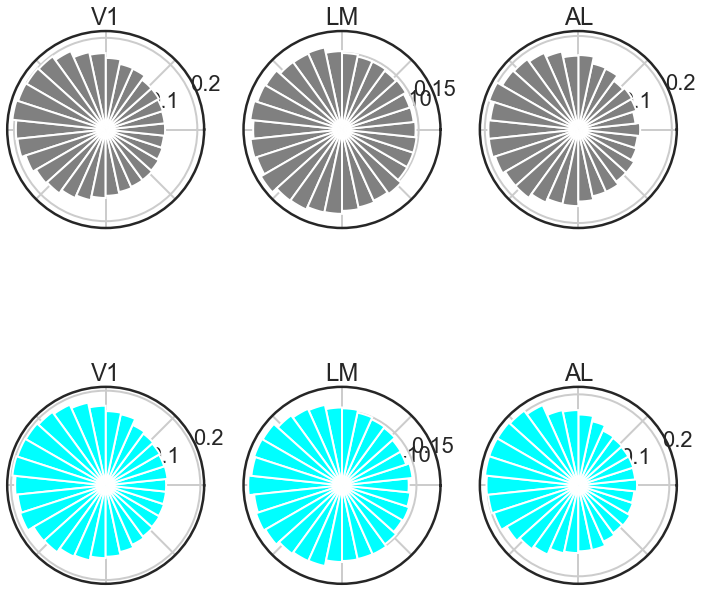

In [53]:
### spike phase
f, ax = plt.subplots(2,3, subplot_kw=dict(projection='polar'),
                     figsize=(12,12)
                    )
ALparam=6,0.03
LMparam=0.75,0.12
param_r=LMparam
# ri='LM'
spkphasedata=spk_phase_df#spk_v1phase_df
# spkphasedata=spk_v1phase_df

to_plot=spkphasedata[spkphasedata.unit.str.contains('')
#                      &(~spkphasedata.unit.str.contains('|'.join(rec_to_exclude)))
#                      &(spk_phase_df.unit.isin(fsunits))
                     &(~spkphasedata.unit.str.contains('|'.join(training_stim['AL'])))
                     &(spkphasedata.tf==param_r[0])
                     &(spkphasedata.sf==param_r[1])
#                      &(spkphasedata.ly=='l4')
                    ]
for i,pp in enumerate(['pre','post']):
    tmp=to_plot[(to_plot.unit.str.contains(pp))]
    for ix,region in enumerate(['V1','LM','AL']):
        tmp1=tmp[(tmp.unit.str.contains(region))]
        spk_phase=np.hstack(tmp1['spk_12-30phase'].values)
    #         spk_phase_amp=np.hstack(tmp1.spk_phase_amp.transform(lambda x:scipy.stats.zscore(x)).values)
        sfc =np.histogram(spk_phase,30,density=True);
    #         sfc_amp =np.histogram(spk_phase_amp);
        bins= (sfc[1]); 
        bins = bins[:len(bins)-1];
        # amps=(sfc[0]-np.mean(sfc[0]))/np.std(sfc[0])
    #         amps=sfc[0]/sfc[0].max()
        ax[i][ix].bar(bins, 
                      sfc[0],
                      width=bins[1]-bins[0], 
                      bottom=0.0,
                      color=colors[pp],
                      )
    #     vector=np.sum(np.exp(1j*(bins+(bins[1]-bins[0])/2)))/len(bins)
    # #         vector=np.sum(amps*np.exp(1j*(bins+(bins[1]-bins[0])/2)))/len(bins)
    # #     ax.set_rlim(-1,3)
    #     ax[i][ix].plot([0,np.angle(vector)],[0,np.abs(vector)],
    #                    color='gray'
    #                   )

        ax[i][ix].set_title(region#,y=1.18
                       )
    #             ax[i][0].text(-5,20, cond)
        ax[i][ix].set_xticklabels([])
        ax[i][ix].legend('',frameon=False)
        ax[i][ix].legend('',frameon=False)
plt.show()


In [75]:
training_stim={'AL': ['ET057', 'ET058', 'ET059','ET060', 'ET061','ET070', 'ET071','ET072'
                      'ET073','ET074'
                     ],
               'LM': ['ET051', 'ET052', 'ET054', 'ET055', 'ET056','ET063', 'ET064'
                     ,'ET065', 'ET066','ET067', 'ET068','ET069','ET031_r','ET075'
                      ,'ET076'
                     ]}


In [77]:
import pingouin as pg

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [30]:
peakzdf=pd.read_pickle(report_directory+'psth/lmtrainingstimtwpeakzsct.pkl')
# peakzdf

C:\Users\tangy\AppData\Local\Temp\ipykernel_13616\2550985787.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ad

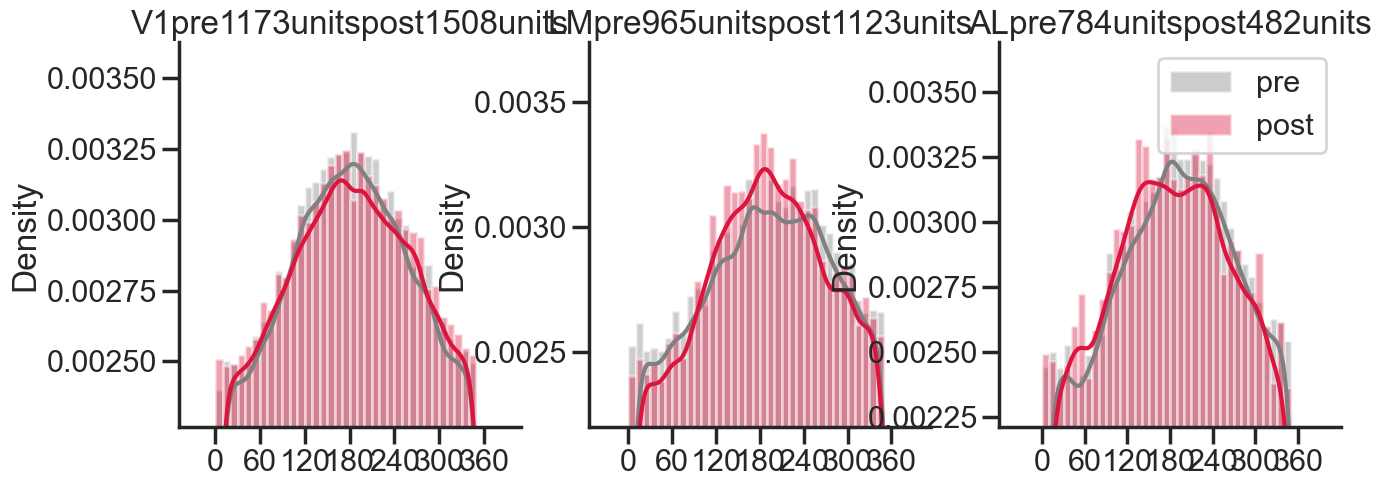

In [91]:
### spike phase
ALparam=6,0.03
LMparam=0.75,0.12
param_r=LMparam
ri='V1'
local=1
    
spkphasedata=spk_phase_df
# spkphasedata=spk_v1phase_df.copy()
# spkphasedata['kgrp']=spkphasedata.unit.map(kgroups)
spkphasedata.head()

to_plot=spkphasedata[(spkphasedata.tf==param_r[0])
                     &(spkphasedata.sf==param_r[1])
                     &(~spkphasedata.unit.str.contains('|'.join(rec_to_exclude)))
#                      &(spkphasedata.unit.str.contains(ri))
#                      &(~spkphasedata.unit.isin(fsunits))
#                      &(spkphasedata.kgrp==3)
                     &(~spkphasedata.unit.str.contains('|'.join(training_stim['AL'])))                     
#                      &(spkphasedata.ly=='l4')
                    ]
to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
                                         +(peakzdf.zscore<=-1).astype(int)*(-1))))


if local:
    attribute='spk_30-50phase'
    f,ax=plt.subplots(1,3,figsize=(15,5),sharey=False)
    for i,rg in enumerate(['V1','LM','AL']):
            for pp in ['pre','post']:
                tmp1=to_plot[to_plot.unit.str.contains(pp)&(to_plot.unit.str.contains(rg))]
                tmp1=tmp1[tmp1[attribute].transform(lambda x:x.shape[0]>1)]
#                 weights=tmp1.ppc.values
#                 tmp1[attribute]=tmp1[attribute].transform(lambda x:pg.circ_mean(x) if x.shape[0]>1 else np.nan)
                spk_phase=np.hstack(tmp1[attribute].values)
            #         spk_phase_amp=np.hstack(tmp1.spk_phase_amp.transform(lambda x:scipy.stats.zscore(x)).values)
                sns.distplot((np.rad2deg(spk_phase)+360)%360
            #                  ,((np.rad2deg(spk_phase)+360)%360)+360
            #                            ,((np.rad2deg(spk_phase)+360)%360)+720
                                       
                             ,label=pp
                             ,kde=True
    #                          ,norm_hist=True
                             ,bins=np.arange(0,360*1,10)
                             ,ax=ax[i]
#                              ,hist_kws={'weights':weights }
                            )

            ax[i].set_title(str(rg)
                  +'pre'+str(len(to_plot[to_plot.unit.str.contains('pre')
                                         &(to_plot.unit.str.contains(rg))
#                                         &(to_plot.exc==exc)
                                        ].unit.unique()))+'units'
                  +'post'+str(len(to_plot[to_plot.unit.str.contains('post')
                                          &(to_plot.unit.str.contains(rg))
#                                          &(to_plot.exc==exc)
                                         ].unit.unique()))+'units'
                 )
            ax[i].set_xticks(np.arange(0,360*1+1,60))
            ymin,ymax=(np.histogram((np.rad2deg(spk_phase)+360)%360, bins=np.arange(0,360*1,15),density=True)[0].min()
                       ,np.histogram((np.rad2deg(spk_phase)+360)%360, bins=np.arange(0,360*1,15),density=True)[0].max())
            ax[i].set_ylim(ymin*0.9,ymax*1.1)

    plt.legend()
    sns.despine()

# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_'+attribute+'_withonestim_'+'_all_rpselected.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_'+attribute+'_withonestim_'+'_all_rpselected.pdf',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'+'_all_.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'+'_all_.pdf',bbox_inches='tight')


In [93]:
# spk_v1phase_df
# excdf=pd.read_pickle(report_directory+'psth/lmtrainingstimexc.pkl')
peakzdf=pd.read_pickle(report_directory+'psth/lmtrainingstimtwpeakzsct.pkl')
peakzdf2=pd.read_pickle(report_directory+'psth/lmtraining3twmeanzsct.pkl')
# peakzdf3=pd.read_pickle(report_directory+'psth/lmtrainingpeakzsct.pkl')

In [96]:
### spike phase
ALparam=6,0.03
LMparam=0.75,0.12
param_r=LMparam
ri='V1'
local=1
    
spkphasedata=spk_phase_df
# spkphasedata=spk_v1phase_df.copy()
# spkphasedata['kgrp']=spkphasedata.unit.map(kgroups)
spkphasedata.head()

to_plot=spkphasedata[(spkphasedata.tf==param_r[0])
                     &(spkphasedata.sf==param_r[1])
                     &(~spkphasedata.unit.str.contains('|'.join(rec_to_exclude)))
#                      &(spkphasedata.unit.str.contains(ri))
#                      &(~spkphasedata.unit.isin(fsunits))
#                      &(spkphasedata.kgrp==3)
                     &(~spkphasedata.unit.str.contains('|'.join(training_stim['AL'])))                     
#                      &(spkphasedata.ly=='l4')
                    ]
to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
                                         +(peakzdf.zscore<=-1).astype(int)*(-1))))
to_plot['peak']=to_plot.unit.map(dict(zip(peakzdf2.id
                        ,(((peakzdf2.tw1>peakzdf2.tw2)&(peakzdf2.tw1>peakzdf2.tw3)).astype(int)
                        +((peakzdf2.tw2>peakzdf2.tw1)&(peakzdf2.tw2>peakzdf2.tw3)).astype(int)*2
                        +((peakzdf2.tw3>peakzdf2.tw1)&(peakzdf2.tw3>peakzdf2.tw2)).astype(int)*3))))
to_plot['rp']=to_plot.unit.map(dict(zip(ppcdf.unit,ppcdf.rayleighp)))
# to_plot['ppc']=to_plot.unit.map(dict(zip(ppcdf.unit,ppcdf.ppc)))
to_plot=to_plot[(to_plot.rp<0.05)]

if local:
    attribute='spk_30-50phase'
    f,ax=plt.subplots(3,3,figsize=(15,15),sharey=False)
    for i,rg in enumerate(['V1','LM','AL']):
#         for j,exc in enumerate([1,0,-1]):
#         for j,exc in enumerate([1,0]):
        for j,exc in enumerate([1,2,3]):
            for pp in ['pre','post']:
                tmp1=to_plot[to_plot.unit.str.contains(pp)&(to_plot.unit.str.contains(rg))
                             &(to_plot.peak==exc)]
                tmp1=tmp1[tmp1[attribute].transform(lambda x:x.shape[0]>1)]
#                 weights=tmp1.ppc.values
#                 tmp1[attribute]=tmp1[attribute].transform(lambda x:pg.circ_mean(x) if x.shape[0]>1 else np.nan)
                spk_phase=np.hstack(tmp1[attribute].values)
            #         spk_phase_amp=np.hstack(tmp1.spk_phase_amp.transform(lambda x:scipy.stats.zscore(x)).values)
                sns.distplot((np.rad2deg(spk_phase)+360)%360
            #                  ,((np.rad2deg(spk_phase)+360)%360)+360
            #                            ,((np.rad2deg(spk_phase)+360)%360)+720
                                       
                             ,label=pp
                             ,kde=True
    #                          ,norm_hist=True
                             ,bins=np.arange(0,360*1,10)
                             ,ax=ax[i][j]
#                              ,hist_kws={'weights':weights }
                            )

            ax[i][j].set_title(str(rg)
                  +'pre'+str(len(to_plot[to_plot.unit.str.contains('pre')
                                         &(to_plot.unit.str.contains(rg))
                                        &(to_plot.peak==exc)
                                        ].unit.unique()))+'units'
                  +'post'+str(len(to_plot[to_plot.unit.str.contains('post')
                                          &(to_plot.unit.str.contains(rg))
                                         &(to_plot.peak==exc)
                                         ].unit.unique()))+'units'
                 )
            ax[i][j].set_xticks(np.arange(0,360*1+1,60))
            ymin,ymax=(np.histogram((np.rad2deg(spk_phase)+360)%360, bins=np.arange(0,360*1,15),density=True)[0].min()
                       ,np.histogram((np.rad2deg(spk_phase)+360)%360, bins=np.arange(0,360*1,15),density=True)[0].max())
            ax[i][j].set_ylim(ymin*0.9,ymax*1.1//0.001*0.001+0.001)

    plt.legend()
    sns.despine()

# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_'+attribute+'_withonestim_'+'_peak3sep_allspikes.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_'+attribute+'_withonestim_'+'_peak3sep_allspikes.pdf',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'+'_peak3sep_rpselectedunitallspk.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'+'_peak3sep_rpselectedunitallspk.pdf',bbox_inches='tight')


C:\Users\tangy\AppData\Local\Temp\ipykernel_13616\2488379951.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
C:\Users\tangy\AppData\Local\Temp\ipykernel_13616\2488379951.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['peak']=to_plot.unit.map(dict(zip(peakzdf2.id


NameError: name 'ppcdf' is not defined

In [91]:
import astropy.stats

In [92]:
####### von Mises distribution fitting params
# to_plot[:100].groupby(['unit','peak','tf','sf']).apply(lambda x:astropy.stats.circstats.vonmisesmle(x['spk_4-8phase'].values))
to_plot=spkphasedata[(~spkphasedata.unit.str.contains('|'.join(rec_to_exclude)))
                     &(~spkphasedata.unit.str.contains('|'.join(training_stim['AL'])))                     
                    ]
to_plot['peak']=to_plot.unit.map(dict(zip(peakzdf2.id
                        ,(((peakzdf2.tw1>peakzdf2.tw2)&(peakzdf2.tw1>peakzdf2.tw3)).astype(int)
                        +((peakzdf2.tw2>peakzdf2.tw1)&(peakzdf2.tw2>peakzdf2.tw3)).astype(int)*2
                        +((peakzdf2.tw3>peakzdf2.tw1)&(peakzdf2.tw3>peakzdf2.tw2)).astype(int)*3))))
to_plot['rp']=to_plot.unit.map(dict(zip(ppcdf.unit,ppcdf.rayleighp)))
# to_plot['ppc']=to_plot.unit.map(dict(zip(ppcdf.unit,ppcdf.ppc)))
to_plot=to_plot[(to_plot.rp<0.05)]

units=to_plot.unit.unique()
chunk_size=100
tmpls=[]
for i in range(len(units)//chunk_size+1):
    tmp=to_plot[to_plot.unit.isin(units[i*chunk_size:(i+1)*chunk_size])]
    tmpdf=tmp.groupby(['unit','peak','tf','sf']
                     ).apply(lambda x:astropy.stats.circstats.vonmisesmle(x['spk_4-8phase'].values[0]))
    tmpdf=tmpdf.to_frame('mu_kappa').reset_index()
    tmpdf['mu']=tmpdf.mu_kappa.transform(lambda x:x[0])
    tmpdf['kappa']=tmpdf.mu_kappa.transform(lambda x:x[1])
    tmpdf=tmpdf.drop(columns=['mu_kappa'])
    tmpls.append(tmpdf)
fitdf=pd.concat(tmpls)
fitdf.head()

# tmpdf=to_plot[to_plot.unit.isin(ppcdf1[ppcdf1.rayleighp<0.05].unit.unique())].groupby(['et','peak','tf','sf']
#                  ).apply(lambda x:astropy.stats.circstats.vonmisesmle(np.hstack(x['spk_4-8phase'].values)))
# tmpdf=tmpdf.to_frame('mu_kappa').reset_index()
# tmpdf['mu']=tmpdf.mu_kappa.transform(lambda x:x[0])
# tmpdf['kappa']=tmpdf.mu_kappa.transform(lambda x:x[1])
# tmpdf=tmpdf.drop(columns=['mu_kappa'])
# fitdf=tmpdf.copy()
# fitdf.head()

C:\Users\tangy\anaconda3\lib\site-packages\astropy\stats\circstats.py:486: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/(x*x*x - 4.0*x*x + 3.0*x)
C:\Users\tangy\anaconda3\lib\site-packages\astropy\stats\circstats.py:31: RuntimeWarning: invalid value encountered in double_scalars
  C = np.sum(weights * np.cos(p * (data - phi)), axis)/np.sum(weights, axis)
C:\Users\tangy\anaconda3\lib\site-packages\astropy\stats\circstats.py:32: RuntimeWarning: invalid value encountered in double_scalars
  S = np.sum(weights * np.sin(p * (data - phi)), axis)/np.sum(weights, axis)
C:\Users\tangy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\tangy\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,unit,peak,tf,sf,mu,kappa
0,ET051_right_post_AL_1,1.0,0.75,0.015,1.362680,0.171898
1,ET051_right_post_AL_1,1.0,0.75,0.030,2.365020,0.304305
2,ET051_right_post_AL_1,1.0,0.75,0.060,-3.079474,0.187059
3,ET051_right_post_AL_1,1.0,0.75,0.120,2.655474,0.176677
4,ET051_right_post_AL_1,1.0,0.75,0.240,2.524199,0.136115


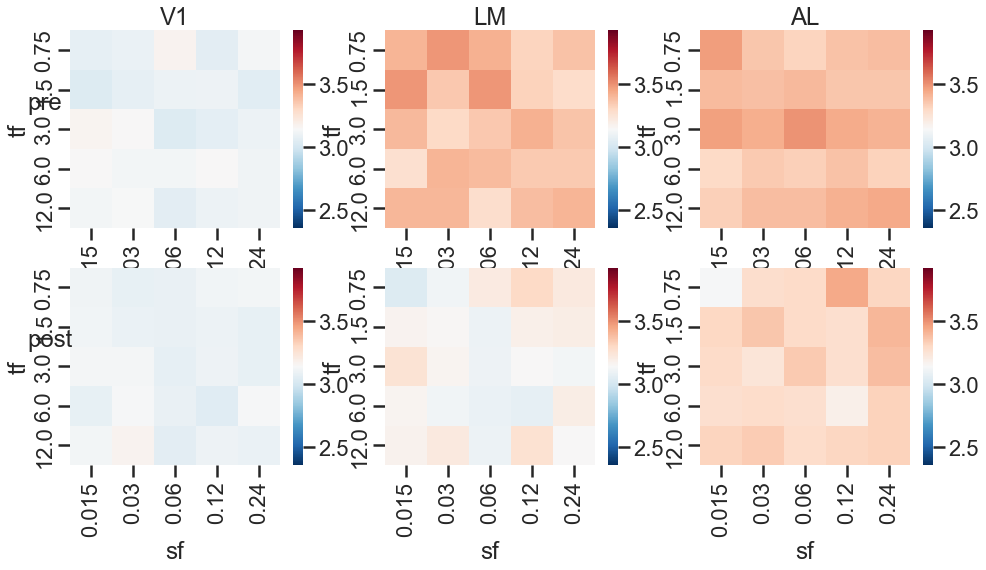

In [99]:
f,ax=plt.subplots(2,3,figsize=(16,8))
for i,pp in enumerate(['pre','post']):
    tmp1=fitdf[(fitdf.pre_post==pp)
              &(fitdf.unit.isin(ppcdf1[ppcdf1.rayleighp<0.05].unit.unique()))
              ]
    for ii,rg in enumerate(['V1','LM','AL']):
        tmp2=tmp1[tmp1.region==rg]
        sns.heatmap(tmp2.groupby(['tf','sf']).mu.median().to_frame('mu').reset_index().pivot('tf','sf','mu')
                   ,ax=ax[i][ii]
                    ,cmap='RdBu_r'
                    ,vmin=np.pi-np.pi*1/4,vmax=np.pi+np.pi*1/4,center=np.pi
                   )
        ax[0][ii].set_title(rg)
    ax[i][0].text(-1,2,pp)
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'+'_volmofitphasecenter_rpselec_sftf.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'+'_volmofitphasecenter_rpselec_sftf.pdf',bbox_inches='tight')


In [76]:
def pcorrection(g,method='fdr_bh'):
    pcorr=pg.multicomp(g['p-val'].values,method=method)[-1]
    g['pcorr']=pcorr
    return g

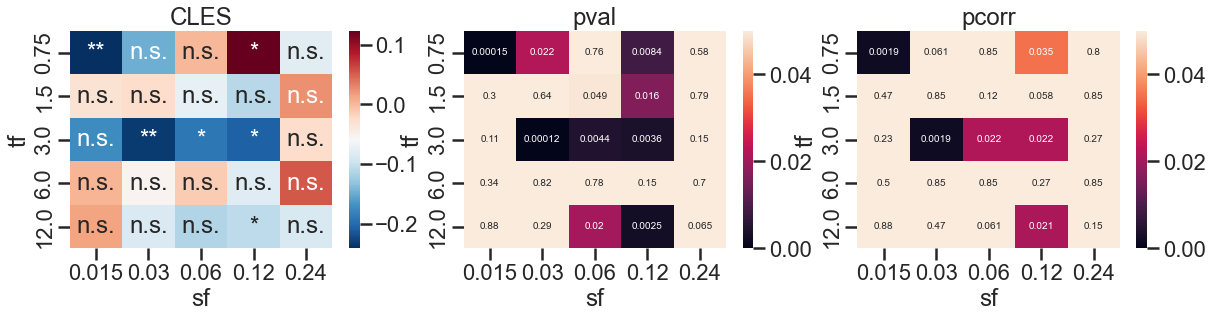

In [219]:
statsls=[]
for n,g in fitdf[(fitdf.unit.isin(ppcdf1[ppcdf1.rayleighp<0.05].unit.unique()))
                ].groupby(['region','tf','sf']):
#     print(n)
    eff,p=astropy.stats.kuiper_two(g[(g.pre_post=='post')
                               &(~g.mu.isna())
                              ].mu
                             ,g[(g.pre_post=='pre')
                                &(~g.mu.isna())
                              ].mu)
    d=g[(g.pre_post=='post')&(~g.mu.isna())].mu.median()-g[(g.pre_post=='pre')&(~g.mu.isna())].mu.median()
    statsls.append(n+(eff,p,d))
statsdf=pd.DataFrame(statsls,columns=['region','tf','sf','eff','p-val','d'])
statsdf=statsdf.groupby('region').apply(lambda x:pcorrection(x))
# statsdf.to_csv(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'
#                +'_volmofitphasecenter_rpselec_sftf_stats.csv')

f,ax=plt.subplots(1,3,figsize=(20,4))
rg='AL'
hm=statsdf[(statsdf.region==rg)
         ].pivot('tf','sf','d')

astk=statsdf[(statsdf.region==rg)
         ].pivot('tf','sf','pcorr').values
astklabel=np.tile(['n.s.']*5,5).reshape(5,5)
astklabel[(astk<0.05)&(astk>0.01)]='*'
astklabel[(astk<=0.01)&(astk>0.001)]='**'
astklabel[(astk<=0.001)]='***'
# astklabel
sns.heatmap(hm,cmap='RdBu_r'
#             ,vmin=hm.min().min()*0.9
#             ,vmax=hm.max().max()*1.1
#             ,center=0.5
            ,ax=ax[0]
            ,annot=astklabel,fmt=''
#             ,annot_kws={'fontsize':10}
           )
ax[0].set_title('CLES')
hm=statsdf[(statsdf.region==rg)
         ].pivot('tf','sf','p-val')
sns.heatmap(hm
            ,vmin=0,vmax=0.05
            ,ax=ax[1],annot=hm,annot_kws={'fontsize':10})
ax[1].set_title('pval')
hm=statsdf[(statsdf.region==rg)
         ].pivot('tf','sf','pcorr')
sns.heatmap(hm
            ,vmin=0,vmax=0.05
            ,ax=ax[2],annot=hm,annot_kws={'fontsize':10})
ax[2].set_title('pcorr')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'
#             +'_volmofitphasecenter_rpselec_sftf_stats_'+rg+'_.png')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_'+attribute+'_withonestim_'
#             +'_volmofitphasecenter_rpselec_sftf_stats_'+rg+'_.pdf')


In [97]:
import pingouin as pg
def calc_ppc(spk_phase):
    if spk_phase.shape[0]>1:
        rayleighz,p=pg.circ_rayleigh(spk_phase)
        pairs=np.array(np.meshgrid(spk_phase.flatten(),spk_phase.flatten())).T
        unique_pairs=pairs[np.triu_indices(pairs.shape[0],k=1)]
#         ppc=np.cos(([np.diff(x) for x in unique_pairs])).sum()/len(unique_pairs)
        ppc=sum([np.cos(x[0])*np.cos(x[1])+np.sin(x[0])*np.sin(x[1]) for x in unique_pairs])/len(unique_pairs)
    else:
        p=np.nan
        ppc=np.nan
    return p,ppc

In [99]:
onestimrecet=set(['_'.join(f[0].split('\\')[-1].split('_')[3:6]
                          ).replace('ET#','ET') for f in onestimmactchc])
onestimrecet

{'ET027_right_pre',
 'ET028_left_pre',
 'ET028_right_pre',
 'ET031_left_pre',
 'ET031_right_post',
 'ET051_right_post',
 'ET052_right_post',
 'ET054_left_post',
 'ET054_right_post',
 'ET055_left_post',
 'ET055_right_post',
 'ET056_left_post',
 'ET056_right_post',
 'ET057_left_post',
 'ET057_right_post',
 'ET058_left_post',
 'ET058_right_post',
 'ET059_left_post',
 'ET059_right_post',
 'ET060_left_post',
 'ET060_right_post',
 'ET061_left_post',
 'ET061_right_post',
 'ET063_left_post',
 'ET063_right_post',
 'ET064_left_post',
 'ET064_right_post',
 'ET065_right_post',
 'ET066_right_post',
 'ET067_left_post',
 'ET067_right_post',
 'ET068_left_post',
 'ET069_left_post',
 'ET069_right_post',
 'ET070_left_post',
 'ET070_right_post',
 'ET071_left_post',
 'ET071_right_post',
 'ET072_left_post',
 'ET072_right_post',
 'ET073_right_post',
 'ET074_left_post',
 'ET074_right_post',
 'ET075_left_post',
 'ET075_right_post',
 'ET076_left_post',
 'ET076_right_post'}

In [104]:
training_stim={'LM': ['ET051','ET052','ET054','ET055',
  'ET056','ET063','ET064','ET065','ET066','ET067',
  'ET068','ET069','ET031_r','ET075','ET076'],
 'AL': ['ET057','ET058','ET059','ET060','ET061',
  'ET070','ET071','ET072','ET073','ET074']}

In [139]:
# %%timeit
ls=[]
chunk_n_units=20
attribute='spk_30-50phase'

spkphasedata=spk_phase_df[spk_phase_df.unit.str.contains('post')
                           &(~spk_phase_df.unit.str.contains('|'.join(training_stim['LM'])))
#                             &(spk_phase_df.unit.str.contains('|'.join(onestimrecet)))
#                          &(spk_phase_df.unit.str.contains('post'))
#                           &(spk_phase_df.unit.str.contains('ET031'))
#                           &(spk_phase_df.tf==0.75)
#                           &(spk_phase_df.sf==0.12)
                          ]

local=1
attribute='spk_30-50phase'
if local:
    for n,g in spkphasedata.groupby(['tf','sf']):
        allunits=sorted(g.unit.unique())
        print(n)
        for i in range(int(len(allunits)/chunk_n_units)+1):
            print(int(len(allunits)/chunk_n_units)-i)
            if i==len(allunits)/chunk_n_units:
                tmpdf=g[g.unit.isin(allunits[i*chunk_n_units:])]
                p,ppc=list(zip(*tmpdf[attribute].transform(lambda x:calc_ppc(x.flatten())).tolist()))
                p=np.array(p)
                ppc=np.array(ppc)
                units=tmpdf.unit.values
            else:
                tmpdf=g[g.unit.isin(allunits[i*chunk_n_units:(i+1)*chunk_n_units])]
                p,ppc=list(zip(*tmpdf[attribute].transform(lambda x:calc_ppc(x.flatten())).tolist()))
                units=tmpdf.unit.values
                p=np.array(p)
                ppc=np.array(ppc)

            ls.append(n+(units,p,ppc))
#             break
#         break
else:
    for n,g in spkphasedata.groupby(['tf','sf']):
        allunits=sorted(g.unit.unique())
        print(n)
        lfply='spk_v1l23phase'
        for i in range(int(len(allunits)/chunk_n_units)+1):
            print(int(len(allunits)/chunk_n_units)-i)
            if i==len(allunits)/chunk_n_units:
                tmpdf=g[g.unit.isin(allunits[i*chunk_n_units:])]
                if tmpdf.size:
                    tmpdf['spk_phase']=tmpdf[lfply].transform(lambda x:x.flatten())
                    tmpdf=tmpdf[tmpdf.spk_phase.transform(lambda x:x.shape[0]>1)]
                    p,ppc=list(zip(*tmpdf.spk_phase.transform(lambda x:calc_ppc(x.flatten())).tolist()))
                    p=np.array(p)
                    ppc=np.array(ppc)
                    units=tmpdf.unit.values
                    ls.append(n+(units,p,ppc))
            else:
                tmpdf=g[g.unit.isin(allunits[i*chunk_n_units:(i+1)*chunk_n_units])]
                tmpdf['spk_phase']=tmpdf[lfply].transform(lambda x:x.flatten())
                tmpdf=tmpdf[tmpdf.spk_phase.transform(lambda x:x.shape[0]>1)]
                p,ppc=list(zip(*tmpdf.spk_phase.transform(lambda x:calc_ppc(x.flatten())).tolist()))
                units=tmpdf.unit.values
                p=np.array(p)
                ppc=np.array(ppc)
#             break
                ls.append(n+(units,p,ppc))
#         break
ppcdf=pd.DataFrame(ls,columns=['tf','sf','unit','rayleighp','ppc'])
ppcdf.head()       

(0.75, 0.015)
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
(0.75, 0.03)
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
(0.75, 0.06)
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29

19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
(12.0, 0.12)
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
(12.0, 0.24)
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


,tf,sf,unit,rayleighp,ppc
0,0.75,0.015,"[ET057_left_post_AL_1, ET057_left_post_AL_10, ...","[1.4922387758297444e-07, 0.34500316951320736, ...","[0.052809147032834645, 0.000305419031967835, -..."
1,0.75,0.015,"[ET057_left_post_AL_162, ET057_left_post_AL_18...","[0.05599566840464949, 0.5530113217754214, 0.07...","[0.030199786397683222, -0.06297384612729132, 0..."
2,0.75,0.015,"[ET057_left_post_AL_36, ET057_left_post_AL_47,...","[0.005453317007021928, 0.7902418776821843, 0.5...","[0.03599800361917497, -0.008036863082096347, -..."
3,0.75,0.015,"[ET057_left_post_AL_83, ET057_left_post_AL_90,...","[0.9073017304611877, 0.9945348575503442, 0.879...","[-0.030040902226296615, -0.03107615825784971, ..."
4,0.75,0.015,"[ET057_left_post_V1_125, ET057_left_post_V1_13...","[0.15482545942744436, 0.01173979367348604, 0.1...","[0.0067651817864811505, 0.013681238380598296, ..."


In [141]:
def unnesting(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left')
# tmp1=unnesting(tmp,['zscore','times']).reset_index()

In [142]:
ppcdf1=unnesting(ppcdf,['unit','rayleighp','ppc']).reset_index()
ppcdf1['region']=ppcdf1['unit'].transform(lambda x:x.split('_')[-2])
ppcdf1['pre_post']=ppcdf1['unit'].transform(lambda x:x.split('_')[-3])
ppcdf1['et']=ppcdf1.unit.transform(lambda x:'_'.join(x.split('_')[:2]))

ppcdf1.head()

C:\Users\tangy\AppData\Local\Temp\ipykernel_13616\1528177300.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df1.join(df.drop(explode, 1), how='left')


,index,unit,rayleighp,ppc,tf,sf,region,pre_post,et
0,0,ET057_left_post_AL_1,1.492239e-07,0.052809,0.75,0.015,AL,post,ET057_left
1,0,ET057_left_post_AL_10,3.450032e-01,0.000305,0.75,0.015,AL,post,ET057_left
2,0,ET057_left_post_AL_102,6.783995e-01,-0.008837,0.75,0.015,AL,post,ET057_left
3,0,ET057_left_post_AL_104,5.464761e-01,-0.001335,0.75,0.015,AL,post,ET057_left
4,0,ET057_left_post_AL_113,4.657531e-01,-0.003998,0.75,0.015,AL,post,ET057_left


In [147]:
#### save ppc
for n,g in ppcdf1.groupby(['region','pre_post','et']):
    g.drop(columns=['index','region','pre_post','et'])
#     if n[1]=='pre':
#         g.to_pickle(report_directory+'sfc/local/ppc/spk_4-8phase_'+str(n[1])
#                     +'_6_0.03_'+str(n[-1])+'_'+str(n[0])+'_ppc_.pkl')
#     else:
# #         print(n)
#         g.to_pickle(report_directory+'sfc/local/ppc/spk_4-8phase_'+str(n[1])
#                     +'_6_0.03_'+str(n[-1])+'_'+str(n[0])+'_ppc_.pkl')
    if n[1]=='pre':
        g.to_pickle(report_directory+'sfc/local/ppc/8-30/new/'+attribute+'_'+str(n[1])
                    +'_6_0.03_'+str(n[-1])+'_'+str(n[0])+'_ppc_.pkl')
    else:
#         print(n)
        g.to_pickle(report_directory+'sfc/local/ppc/8-30/new/'+attribute+'_'+str(n[1])
                    +'_6_0.03_'+str(n[-1])+'_'+str(n[0])+'_ppc_.pkl')


In [59]:
#### load ppc post different freq
l=[]
# for f in glob.glob(report_directory+'sfc/local/ppc/*spk_4-8phase*ppc_pseudo*.pkl'):
#     print(f)
#     chunk=pd.read_pickle(f)
# #     chunk=unnesting(chunk,['unit','rayleighp','ppc']).reset_index()
#     l.append(chunk)
# ppcdf=pd.concat(l)
for f in glob.glob(report_directory+'sfc/local/ppc/*spk_4-8phase*p*ppc_.pkl'):
    print(f)
    chunk=pd.read_pickle(f)
#     chunk=unnesting(chunk,['unit','rayleighp','ppc']).reset_index()
#     chunk=chunk[~((chunk.unit.isin(ppcdf.unit.unique()))
#                 &(chunk.tf==ppcdf.tf.unique()[0])
#                 &(chunk.sf==ppcdf.sf.unique()[0])
#                 )]
    if '4-8ppc' in chunk.columns:
        chunk['ppc']=chunk['4-8ppc']
    l.append(chunk)
ppcdf=pd.concat(l)
ppcdf['region']=ppcdf['unit'].transform(lambda x:x.split('_')[-2])
ppcdf['pre_post']=ppcdf['unit'].transform(lambda x:x.split('_')[-3])
ppcdf['et']=ppcdf.unit.transform(lambda x:'_'.join(x.split('_')[:2]))
ppcdf=ppcdf.drop(columns=['4-8ppc','8-12ppc','12-30ppc'])
ppcdf.head()

u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET060_right_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET067_right_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET058_right_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET064_right_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET064_left_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET063_right_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET057_left_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_pre_0.75_0.12_ET021_left_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET055_right_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_pr

u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET065_right_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET057_right_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET064_left_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET058_right_AL_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET059_left_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_0.12_ET054_right_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_pre_0.75_0.12_ET028_left_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET057_left_AL_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_6_0.03_ET058_left_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc\spk_4-8phase_post_0.75_

,index,unit,rayleighp,ppc,tf,sf,region,pre_post,et
1093,54,ET060_right_post_V1_104,7.447397e-04,0.081056,0.75,0.015,V1,post,ET060_right
1094,54,ET060_right_post_V1_11,2.706904e-07,0.051067,0.75,0.015,V1,post,ET060_right
1095,54,ET060_right_post_V1_119,1.692158e-01,0.009043,0.75,0.015,V1,post,ET060_right
1096,54,ET060_right_post_V1_1,5.368012e-01,-0.004690,0.75,0.015,V1,post,ET060_right
1097,54,ET060_right_post_V1_107,2.391084e-14,0.189865,0.75,0.015,V1,post,ET060_right


In [61]:
l=[]
# for f in glob.glob(report_directory+'sfc/local/ppc/8-30/new/*spk_8-12phase*ppc_onestim.pkl'):
# for f in glob.glob(report_directory+'sfc/local/ppc/8-30/new/*spk_8-12phase*ppc_pseudo*.pkl'):
#     print(f)
#     chunk=pd.read_pickle(f)
#     l.append(chunk)
# ppcdf1=pd.concat(l)
for f in glob.glob(report_directory+'sfc/local/ppc/8-30/new/*spk_8-12phase*ppc_new.pkl'):
    print(f)
    chunk=pd.read_pickle(f)
#     chunk=chunk[~((chunk.unit.isin(ppcdf1.unit.unique()))
#                 &(chunk.tf==ppcdf1.tf.unique()[0])
#                 &(chunk.sf==ppcdf1.sf.unique()[0])
#                 )]
    l.append(chunk)
ppcdf2=pd.concat(l)
phase1=dict(zip(zip(ppcdf2.unit,ppcdf2.tf,ppcdf2.sf),ppcdf2.ppc))
l=[]
# for f in glob.glob(report_directory+'sfc/local/ppc/8-30/new/*spk_12-30phase*ppc_onestim.pkl'):
# for f in glob.glob(report_directory+'sfc/local/ppc/8-30/new/*spk_12-30phase*ppc_pseudo*.pkl'):
#     print(f)
#     chunk=pd.read_pickle(f)
# #     chunk=unnesting(chunk,['unit','rayleighp','ppc']).reset_index()
#     l.append(chunk)
# ppcdf1=pd.concat(l)
for f in glob.glob(report_directory+'sfc/local/ppc/8-30/new/*spk_12-30phase*ppc_.pkl'):
    print(f)
    chunk=pd.read_pickle(f)
#     chunk=unnesting(chunk,['unit','rayleighp','ppc']).reset_index()
#     chunk=chunk[~((chunk.unit.isin(ppcdf1.unit.unique()))
#                 &(chunk.tf==ppcdf1.tf.unique()[0])
#                 &(chunk.sf==ppcdf1.sf.unique()[0])
#                 )]
    l.append(chunk)
ppcdf3=pd.concat(l)
phase2=dict(zip(zip(ppcdf3.unit,ppcdf3.tf,ppcdf3.sf),ppcdf3.ppc))
ppcdf1=ppcdf.copy()#[(ppcdf.tf==0.75)&(ppcdf.sf==0.12)]
ppcdf1=ppcdf1.rename(columns={'ppc':'4-8ppc'})
ppcdf1['8-12ppc']=ppcdf1.set_index(['unit', 'tf','sf']).index.map(phase1)
ppcdf1['12-30ppc']=ppcdf1.set_index(['unit', 'tf','sf']).index.map(phase2)
ppcdf1.head()

u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET020_left_AL_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET019_left_AL_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_post_0.75_0.12_ET051_right_AL_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_post_0.75_0.12_ET054_left_V1_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET025_left_AL_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET027_right_LM_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_post_0.75_0.12_ET064_right_LM_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_post_0.75_0.12_ET055_right_LM_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\sp

u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_post_0.75_0.12_ET066_right_V1_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET025_left_LM_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_post_0.75_0.12_ET063_right_LM_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET023_right_AL_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET031_left_V1_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET028_right_LM_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET016_left_LM_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_8-12phase_pre_0.75_0.12_ET023_left_V1_ppc_new.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_

u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_pre_0.75_0.12_ET013_left_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_post_0.75_0.12_ET056_left_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_pre_0.75_0.12_ET014_left_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_post_0.75_0.12_ET063_right_LM_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_pre_0.75_0.12_ET017_right_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_pre_0.75_0.12_ET025_right_AL_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_pre_0.75_0.12_ET024_left_AL_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_pre_0.75_0.12_ET024_left_V1_ppc_.pkl
u:\Data\tang232\V1+LM\report\dur200bpn/sfc/local/ppc/8-30/new\spk_12-30phase_post_0

,index,unit,rayleighp,4-8ppc,tf,sf,region,pre_post,et,8-12ppc,12-30ppc
1093,54,ET060_right_post_V1_104,7.447397e-04,0.081056,0.75,0.015,V1,post,ET060_right,NaN,NaN
1094,54,ET060_right_post_V1_11,2.706904e-07,0.051067,0.75,0.015,V1,post,ET060_right,NaN,NaN
1095,54,ET060_right_post_V1_119,1.692158e-01,0.009043,0.75,0.015,V1,post,ET060_right,NaN,NaN
1096,54,ET060_right_post_V1_1,5.368012e-01,-0.004690,0.75,0.015,V1,post,ET060_right,NaN,NaN
1097,54,ET060_right_post_V1_107,2.391084e-14,0.189865,0.75,0.015,V1,post,ET060_right,NaN,NaN


In [111]:
# spk_v1phase_df
# excdf=pd.read_pickle(report_directory+'psth/lmtrainingstimexc.pkl')
peakzdf=pd.read_pickle(report_directory+'psth/lmtrainingstimtwpeakzsct.pkl')
peakzdf2=pd.read_pickle(report_directory+'psth/lmtraining3twmeanzsct.pkl')
# peakzdf3=pd.read_pickle(report_directory+'psth/lmtrainingpeakzsct.pkl')

C:\Users\tangy\AppData\Local\Temp/ipykernel_35332/1734842797.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
C:\Users\tangy\AppData\Local\Temp/ipykernel_35332/1734842797.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['peak']=to_plot.unit.map(dict(zip(peakzdf2.id
C:\Users\tangy\AppData\Local\Temp/ipykernel_35332/1734842797.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

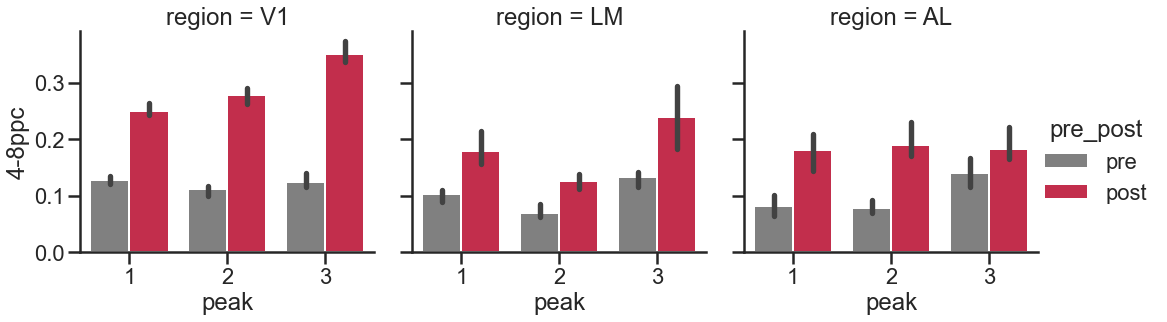

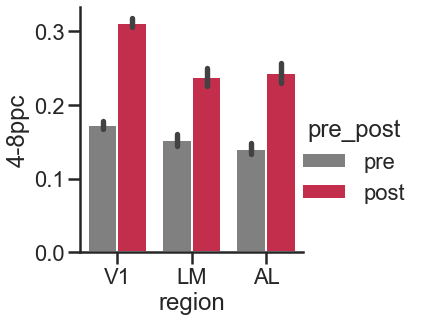

In [113]:
#### local ppc
# ppcdf1=ppcdf.copy()#unnesting(ppcdf,['unit','rayleighp','ppc']).reset_index()

ALparam=6,0.03
LMparam=0.75,0.12
param_r=LMparam
# ri='LM'

to_plot=ppcdf1[
         (~ppcdf1.unit.str.contains('|'.join(rec_to_exclude)))
         &(~ppcdf1.unit.str.contains('|'.join(training_stim['AL'])))
            &(ppcdf1.rayleighp<0.05)
         &(ppcdf1.tf==param_r[0])
         &(ppcdf1.sf==param_r[1])
    &(~ppcdf1['4-8ppc'].isin([np.nan, np.inf, -np.inf,]))
                ]
# to_plot['kgroup']=to_plot.unit.map(sftfkgroups)
# to_plot.loc[to_plot.kgroup.isna(),'kgroup']=-1

to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
                                         +(peakzdf.zscore<=-1).astype(int)*(-1))))
to_plot['peak']=to_plot.unit.map(dict(zip(peakzdf2.id
                        ,(((peakzdf2.tw1>peakzdf2.tw2)&(peakzdf2.tw1>peakzdf2.tw3)).astype(int)
                        +((peakzdf2.tw2>peakzdf2.tw1)&(peakzdf2.tw2>peakzdf2.tw3)).astype(int)*2
                        +((peakzdf2.tw3>peakzdf2.tw1)&(peakzdf2.tw3>peakzdf2.tw2)).astype(int)*3))))
to_plot['phs']=to_plot.unit.map(dict(zip(spk_phase_df.unit
 ,(spk_phase_df['spk_4-8phase'].transform(lambda x:pg.circ_mean(x) if x.shape[0]>0 else np.nan
                                          )))))

to_plot.loc[(to_plot.phs>=-np.pi/4)&(to_plot.phs<np.pi/4),'phsgrp']=0
to_plot.loc[(to_plot.phs>=np.pi/4)&(to_plot.phs<np.pi/4*3),'phsgrp']=1
to_plot.loc[(to_plot.phs>=np.pi/4*3)|(to_plot.phs<-np.pi/4*3),'phsgrp']=2
to_plot.loc[(to_plot.phs>=-np.pi/4*3)&(to_plot.phs<-np.pi/4),'phsgrp']=3
########## threshold with k group ppc medians
# ppcthresh=to_plot.groupby('kgroup').ppc.median()

# to_plot.head()
to_plot['region']=to_plot.unit.transform(lambda x:x.split('_')[-2])
to_plot['pre_post']=to_plot.unit.transform(lambda x:x.split('_')[-3])
g=sns.catplot(x="peak", y="4-8ppc", data=to_plot,  kind = 'bar'
            ,col='region'
#               ,order=[1,0,-1]
#               ,order=['pre','post']
              , hue = 'pre_post' 
                ,hue_order=['pre','post']
                ,ci = 68
          , units = 'unit'
                ,estimator=np.nanmedian
              ,sharey=True
             )
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_ppcmed_withonestim_rpselected_peak3sep2.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_ppcmed_withonestim_rpselected_peak3sep2.pdf',bbox_inches='tight')
g=sns.catplot(x="region", y="4-8ppc", data=to_plot,  kind = 'bar'
#           , height = 4, aspect=1.2
              ,order=['V1','LM','AL']
              , hue = 'pre_post' 
                ,hue_order=['pre','post']
                ,ci = 68
          , units = 'unit'
                ,estimator=np.nanmean
              ,sharey=True
#                  ,palette={'pre':'gray','post':'red'}
             )

# sns.despine()
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_spk_4-8phase_ppc_withonestim_rpselected.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/LMtraining_spk_4-8phase_ppc_withonestim_rpselected.pdf',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_ppcmedian_withonestim_phs4sep_rpselected.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_ppcmedian_withonestim_phs4sep_rpselected.pdf',bbox_inches='tight')

C:\Users\tangy\AppData\Local\Temp/ipykernel_4068/3077176938.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)


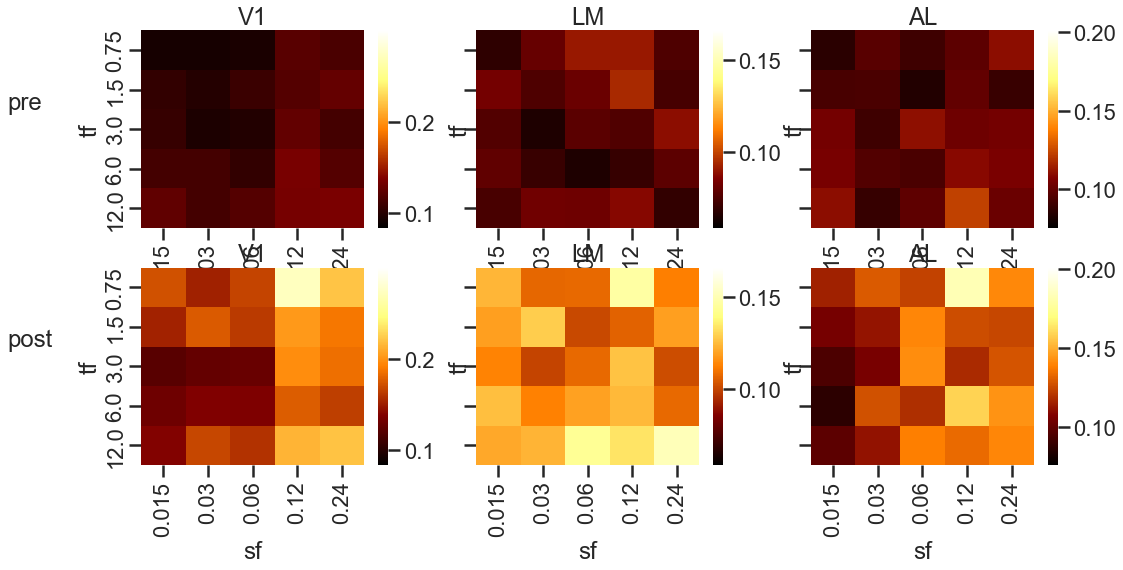

In [117]:
#### local ppc sf tf specificity
ALparam=6,0.03
LMparam=0.75,0.12
param_r=LMparam
# ri='LM'
value='4-8ppc'
to_plot=ppcdf1[
         (~ppcdf1.unit.str.contains('|'.join(training_stim['AL'])))
#         &(~ppcdf1.unit.str.contains('|'.join(rec_to_exclude)))
#          &(~ppcdf1.unit.str.contains('post'))
            &(ppcdf1.rayleighp<0.05)
#     &(ppcdf1.exc==0)
    &(~ppcdf1['4-8ppc'].isin([np.nan, np.inf, -np.inf]))
                ]
to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
                                         +(peakzdf.zscore<=-1).astype(int)*(-1))))
# to_plot['kgroup']=to_plot.unit.map(sftfkgroups)
# to_plot.loc[to_plot.kgroup.isna(),'kgroup']='unselective'

# to_plot=to_plot[to_plot.kgroup.isin([1,2])]

# to_plot=to_plot.groupby(['et','pre_post','region','tf','sf']
#                        ).median().groupby(level=[0,1,2]).apply(lambda x:x/x.max()).reset_index()
to_plot=to_plot.groupby(['tf','sf','region','pre_post'])[value].median().reset_index()
f,ax=plt.subplots(2,3,figsize=(17,8),sharey=True)
for ii,pp in enumerate(['pre','post']):
    tmp=to_plot[to_plot.pre_post==pp]
#     tmp.groupby(['pre_post']).
    for i,rg in enumerate(['V1','LM','AL']):
        hm=tmp[tmp.region==rg].pivot('tf','sf',value)
#         sns.heatmap(hm,cmap='afmhot',ax=ax[ii][i]
# #                     ,vmin=hm.min().min()*0.9,vmax=hm.max().max()*1.1
# #                     ,vmin=0.,vmax=0.4
#                    )
#         if i==0:
        sns.heatmap(hm,cmap='afmhot',ax=ax[ii][i]
#                     ,vmin=0
                    ,vmax=to_plot[to_plot.region==rg][value].max()*1.1
                   ,vmin=to_plot[to_plot.region==rg][value].min()*0.9
#                     ,vmax=to_plot[value].max()*1.1
#                    ,vmin=to_plot[value].min()*0.9
                   )
#         if i!=0:
#             sns.heatmap(hm,cmap='afmhot',ax=ax[ii][i],vmin=0,vmax=0.08)
        ax[ii][i].set_title(rg)
    ax[ii][0].text(-3,2,pp)
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_medianppc_withonestim_preposttfsfnew_rpselected.png',bbox_inches='tight')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_medianppc_withonestim_preposttfsfnew_rpselected.pdf',bbox_inches='tight')

In [82]:
to_plot=ppcdf1[
         (~ppcdf1.unit.str.contains('|'.join(training_stim['LM'])))
        &(~ppcdf1.unit.str.contains('|'.join(rec_to_exclude)))
#          &(~ppcdf1.unit.str.contains('post'))
#             &(ppcdf1.rayleighp<0.05)
#     &(ppcdf1.exc==0)
    &(~ppcdf1['4-8ppc'].isin([np.nan, np.inf, -np.inf]))
                ]
to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
                                         +(peakzdf.zscore<=-1).astype(int)*(-1))))
to_plot['ppc']=to_plot['4-8ppc']
pg.anova(data=to_plot,dv='ppc',between=['region','pre_post','exc','tf','sf'],detailed=True)

<ipython-input-82-9d5f95f359da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
<ipython-input-82-9d5f95f359da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['ppc']=to_plot['4-8ppc']


,Source,SS,DF,MS,F,p-unc,np2
0,region,147.404691,2.0,73.702345,3396.285533,0.000000e+00,0.050197
1,pre_post,22.233226,1.0,22.233226,1024.531645,6.394337e-224,0.007908
2,exc,24.413866,2.0,12.206933,562.508958,5.867548e-244,0.008677
3,tf,2.336582,4.0,0.584146,26.918074,2.332147e-22,0.000837
4,sf,2.568291,4.0,0.642073,29.587418,1.234645e-24,0.000920
5,region * pre_post,7.028354,2.0,3.514177,161.937152,5.755078e-71,0.002514
6,region * exc,4.152395,4.0,1.038099,47.836741,2.918110e-40,0.001487
7,pre_post * exc,1.279667,2.0,0.639833,29.484227,1.577972e-13,0.000459
8,region * tf,1.562800,8.0,0.195350,9.001946,1.965181e-12,0.000560
9,pre_post * tf,0.778899,4.0,0.194725,8.973134,3.051627e-07,0.000279


<ipython-input-87-b64b31a818bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
<ipython-input-87-b64b31a818bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['ppc']=to_plot['4-8ppc']


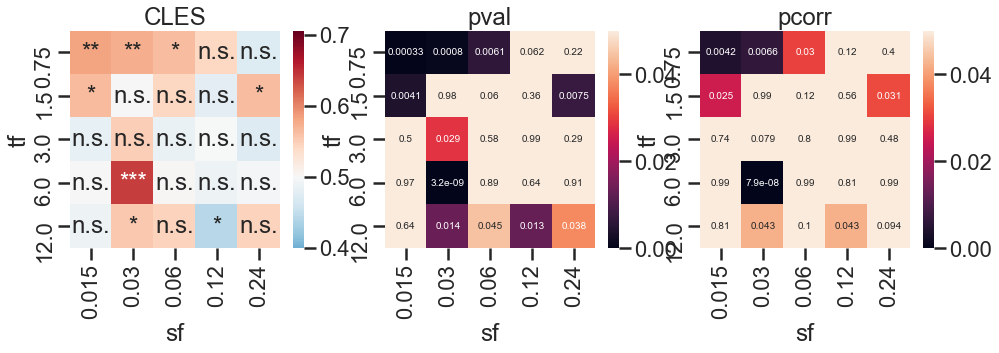

In [87]:
to_plot=ppcdf1[
         (~ppcdf1.unit.str.contains('|'.join(training_stim['LM'])))
        &(~ppcdf1.unit.str.contains('|'.join(rec_to_exclude)))
#          &(~ppcdf1.unit.str.contains('post'))
            &(ppcdf1.rayleighp<0.05)
#     &(ppcdf1.exc==0)
    &(~ppcdf1['4-8ppc'].isin([np.nan, np.inf, -np.inf]))
                ]
to_plot['exc']=to_plot.unit.map(dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
                                         +(peakzdf.zscore<=-1).astype(int)*(-1))))
to_plot['ppc']=to_plot['4-8ppc']
    

ls=[]
for n,g in to_plot.groupby(['tf','sf','region']):
#     print(n)
    stat=pg.mwu(g[g.pre_post=='post'].ppc,g[g.pre_post=='pre'].ppc)
    stat=stat.join(pd.DataFrame(dict(zip(['tf','sf','region'],n)),index=['MWU']))
    stat['postnunit']=g[g.pre_post=='post'].unit.nunique()
    stat['prenunit']=g[g.pre_post=='pre'].unit.nunique()
    stat['postnet']=g[g.pre_post=='post'].unit.transform(lambda x:'_'.join(x.split('_')[:-1])).nunique()
    stat['prenet']=g[g.pre_post=='pre'].unit.transform(lambda x:'_'.join(x.split('_')[:-1])).nunique()
    ls.append(stat)
statdf=pd.concat(ls)
def pcorrection(g):
    pcorr=pg.multicomp(g['p-val'].values,method='fdr_bh')[-1]
    g['pcorr']=pcorr
    return g
statdf=statdf.groupby('region').apply(lambda x:pcorrection(x))
# statdf.to_csv(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_medianppc_withonestim_preposttfsfnew_rpselected_stats.csv')


f,ax=plt.subplots(1,3,figsize=(16,4))
rg='AL'
# kgroup=[0,3]
hm=statdf[(statdf.region==rg)
         ].pivot('tf','sf','CLES')

astk=statdf[(statdf.region==rg)
         ].pivot('tf','sf','pcorr').values
astklabel=np.tile(['n.s.']*5,5).reshape(5,5)
astklabel[(astk<0.05)&(astk>0.01)]='*'
astklabel[(astk<=0.01)&(astk>0.001)]='**'
astklabel[(astk<=0.001)]='***'
# astklabel
sns.heatmap(hm,cmap='RdBu_r'
            ,vmin=hm.min().min()*0.9
            ,vmax=hm.max().max()*1.1
            ,center=0.5,ax=ax[0]
            ,annot=astklabel,fmt=''
#             ,annot_kws={'fontsize':10}
           )
ax[0].set_title('CLES')
hm=statdf[(statdf.region==rg)
         ].pivot('tf','sf','p-val')
sns.heatmap(hm,vmin=0,vmax=0.05,ax=ax[1],annot=hm,annot_kws={'fontsize':10})
ax[1].set_title('pval')
hm=statdf[(statdf.region==rg)
         ].pivot('tf','sf','pcorr')
sns.heatmap(hm,vmin=0,vmax=0.05,ax=ax[2],annot=hm,annot_kws={'fontsize':10})
ax[2].set_title('pcorr')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_medianppc_withonestim_preposttfsfnew_rpselected'+rg+'stats.png')
# plt.savefig(report_directory+'sfc/local/ppc/ALtraining_spk_4-8phase_medianppc_withonestim_preposttfsfnew_rpselected'+rg+'stats.pdf')

